# **Final Project: UK Used Car Data Set**

Data Poltergeists Team:
- Fachmi Aditama
- Muhammad Alif Syahreza

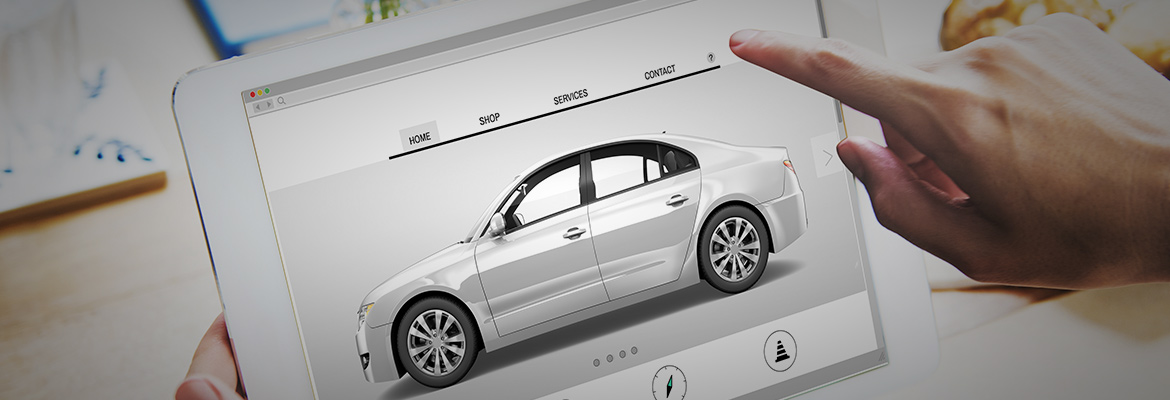

# Outline
1. Business Problem Understanding
1. Data Understanding
1. Data Cleaning
1. EDA
1. Modeling
1. Conclusion and Recommendation


# 1. Business Problem Understanding

## 1.1 Konteks
Perusahaan jual beli mobil bekas online ini telah berkembang pesat dalam beberapa tahun terakhir seiring meningkatnya minat konsumen untuk beralih ke platform online dalam melakukan transaksi jual beli mobil. Baik perorangan maupun korporasi semakin banyak menggunakan platform ini untuk menjual mobil bekas mereka, karena platform ini menawarkan kemudahan akses, jangkauan pasar yang luas, serta proses transaksi yang lebih cepat dibandingkan metode jual beli konvensional.

Namun, dengan persaingan pasar yang semakin ketat, banyak penjual dan pembeli mulai membandingkan harga antar platform. Hal ini menciptakan tekanan bagi perusahaan untuk memastikan harga yang kompetitif tanpa mengorbankan margin keuntungan yang dapat mereka peroleh. Oleh karena itu, perusahaan membutuhkan solusi yang dapat membantu penjual menetapkan harga optimal—harga yang tidak terlalu tinggi sehingga tidak mengurangi daya saing, namun juga tidak terlalu rendah sehingga mengurangi potensi keuntungan.

## 1.2 Problem Statement
Salah satu tantangan terbesar dalam industri jual beli mobil bekas adalah penetapan harga. Dalam pasar yang dinamis dan kompetitif seperti ini, penjual sering kali menghadapi dua risiko utama:

- Harga Terlalu Tinggi: Jika mobil dijual dengan harga yang terlalu tinggi, calon pembeli cenderung akan memilih penawaran dari kompetitor lain yang menawarkan harga lebih rendah untuk model mobil serupa. Hal ini menyebabkan tingkat konversi penjualan menurun dan memperlambat perputaran inventaris.
- Harga Terlalu Rendah: Di sisi lain, jika penjual menaruh harga terlalu rendah, meskipun menarik minat pembeli, hal ini mengurangi keuntungan yang dapat diperoleh, baik bagi penjual maupun perusahaan platform. Menetapkan harga yang terlalu rendah juga dapat merusak persepsi pasar terhadap nilai mobil bekas secara keseluruhan.

Saat ini, perusahaan belum memiliki alat otomatis yang dapat membantu calon penjual menetapkan harga optimal yang seimbang antara kompetisi pasar dan margin keuntungan. Oleh karena itu, perusahaan ingin membangun sebuah model prediksi harga mobil bekas yang dapat membantu penjual menentukan harga berdasarkan variabel-variabel yang relevan seperti tahun pembuatan, merek, model, jarak tempuh, ukuran mesin, dan jenis bahan bakar.

## 1.3 Tujuan
- **Tujuan Utama**: Mengembangkan model machine learning yang mampu memprediksi harga jual mobil bekas secara akurat berdasarkan fitur-fitur yang tersedia dalam dataset (misalnya, jarak tempuh, tahun produksi, tipe bahan bakar, ukuran mesin, dll.).
- **Tujuan Tambahan**: Memberikan wawasan mengenai faktor-faktor yang paling mempengaruhi harga mobil, sehingga perusahaan dapat menyesuaikan strategi penetapan harga secara lebih efektif.

## 1.4 Evaluasi Metrik
- **MAE (Mean Absolute Error)**: Mengukur rata-rata kesalahan absolut yang dihasilkan oleh model regresi.
- **MAPE (Mean Absolute Percentage Error)**: Mengukur rata-rata persentase error yang dihasilkan oleh model regresi.
- **Cross-Validation Score**: Untuk memastikan model dapat diterapkan dengan baik pada data baru.

Dengan mengembangkan model prediksi harga ini, perusahaan dapat memanfaatkan keputusan berbasis data untuk menetapkan harga mobil bekas yang lebih kompetitif dan transparan, meningkatkan kepuasan pelanggan dan mempercepat proses penjualan.

# 2. Data Understanding

## Source
Dataset: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data

## Attribute Information
- Setiap baris merepresentasikan satu mobil bekas yang terdaftar untuk dijual.
- Tidak terdapat unique id yang dapat membedakan antara suatu mobil bekas dengan mobil bekas lainnya.

| **Attribute** | **Tipe Data** | **Description** |
|---|---|---|
| brand | object | Brand pabrikan mobil |
| model | object  | Model mobil |
| year | int64 | Tahun pembuatan mobil |
| transmission | object | Jenis transmisi mobil |
| mileage | int64 | Jarak yang sudah ditempuh mobil (mile)  |
| fuelType | object | Jenis bahan bakar yang digunakan |
| tax | int64 | Pajak tahunan mobil |
| mpg | float64 | Efisiensi bahan bakar (miles per gallon) |
| engineSize | float64 | Kapasitas mesin mobil dalam liter |
| price | int64  | Harga mobil dalam Poundsterling (£) |


# 3. Exploratory Data Analysis

## Load Dataset

In [9]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Karena dataset awal terdiri dari beberapa merk mobil bekas yang terpisah, maka nantinya dilakukan penggabungan data dari semua merk mobil yang tersedia menjadi satu dataset baru.

Pada dataset ini, kami tidak menggunakan dataset unclean, focus, dan cclass. Alasan tidak menggunakan dataset unclean dikarenakan banyaknya missing value dan dataset tersebut merupakan data focus dan cclass sebelum dilakukan data cleaning.

Sedangkan pada cclass dan focus, sebagian besar data mobil pada dataset tersebut sudah termasuk pada dataset ford dan juga merc, sehingga menyebabkan banyaknya data duplikat. Selain itu, data cclass dan focus memiliki fitur yang lebih sedikit (hanya 7 fitur) dibandingkan dengan dataset lainnya (9 fitur), karena data set focus dan cclass merupakan dataset paling awal sebelum dilakukan pengembangan dataset menjadi lebih luas.

In [11]:
# Load Dataset
car = ['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']

for i in car:
    # Dynamically create a dataframe for each car using globals()
    globals()[i] = pd.read_csv(f'{i}.csv')
    if i == 'hyundi':
        globals()[i].rename(columns={'tax(£)': 'tax'}, inplace=True)

In [12]:
# Menambahkan kolom brand kedalam dataset
for i in car:
    if i == 'hyundi':
        globals()[i].insert(0, 'brand', 'Hyundai')
    else:
        globals()[i].insert(0, 'brand', f'{i.capitalize()}')

In [13]:
# Menggabungkan dataset yang tersedia menjadi dataset baru.
df = pd.concat([audi, bmw, ford, hyundi,
 merc, skoda, toyota, vauxhall, vw], axis=0)

In [14]:
df['price'] = df.pop('price')
# Menampilkan jumlah dan tipe data untuk tiap kolom
display(df.info(),df.describe(include='number'),df.describe(exclude='number'))

<class 'pandas.core.frame.DataFrame'>
Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         99187 non-null  object 
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   price         99187 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


None

,year,mileage,tax,mpg,engineSize,price
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,23058.914213,120.299838,55.166825,1.663280,16805.347656
std,2.123934,21148.523721,63.150926,16.138522,0.557646,9866.773417
min,1970.000000,1.000000,0.000000,0.300000,0.000000,450.000000
25%,2016.000000,7425.000000,125.000000,47.100000,1.200000,9999.000000
50%,2017.000000,17460.000000,145.000000,54.300000,1.600000,14495.000000
75%,2019.000000,32339.000000,145.000000,62.800000,2.000000,20870.000000
max,2060.000000,323000.000000,580.000000,470.800000,6.600000,159999.000000


,brand,model,transmission,fuelType
count,99187,99187,99187,99187
unique,9,195,4,5
top,Ford,Fiesta,Manual,Petrol
freq,17965,6557,56445,54928


Dari hasil statistik deskriptif pada kolom numerik, pada kolom `year` terlihat ada kendaraan yang diregistrasi pada tahun **1970** dan **2060**, juga terdapat nilai 0 pada kolom `tax` dan `engineSize` sehingga perlu dilakukan pemeriksaan lebih lanjut.

Terlihat juga sebaran data yang cukup besar pada kolom `mileage` sebesar 21148.91 dan kolom `price` sebesar 9866.77.

In [16]:
# Menampilkan kolom numerik dan kolom kategorik
display(df.select_dtypes(include='number').columns,df.select_dtypes(exclude='number').columns)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'], dtype='object')

Index(['brand', 'model', 'transmission', 'fuelType'], dtype='object')

In [17]:
# Menampilkan data pada setiap kolom kategorik
for i in df.describe(exclude='number').columns:
    print(i)
    if i == 'model':
        display(df[i].nunique(), df[i].head().unique())
    else:
        display(df[i].nunique(), df[i].unique())

brand


9

array(['Audi', 'Bmw', 'Ford', 'Hyundai', 'Merc', 'Skoda', 'Toyota',
       'Vauxhall', 'Vw'], dtype=object)

model


195

array([' A1', ' A6', ' A4', ' A3'], dtype=object)

transmission


4

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

fuelType


5

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

Terdapat spasi pada data kolom `model`, sehingga harus diperbaiki.

## Data Distribution

`Univariate Numerik`

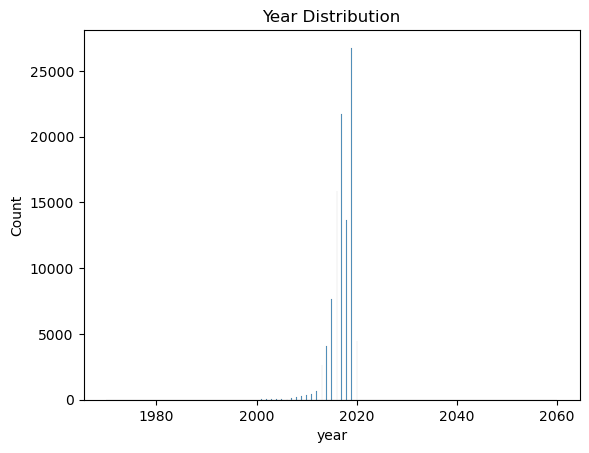

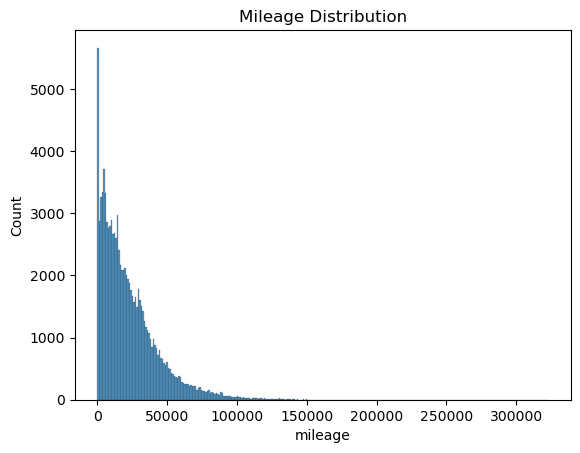

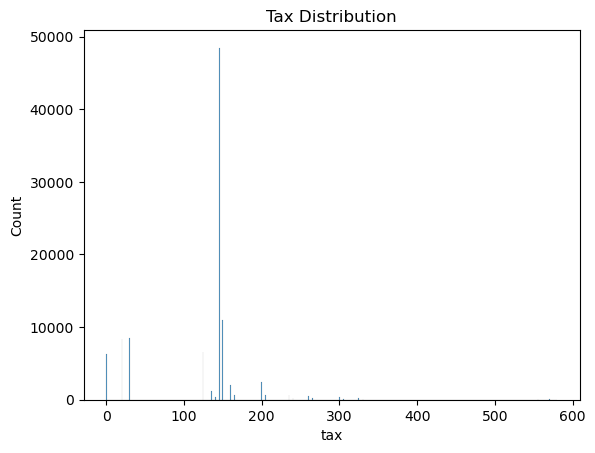

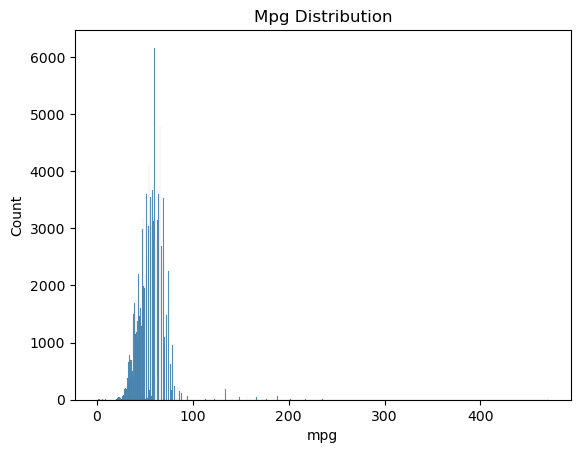

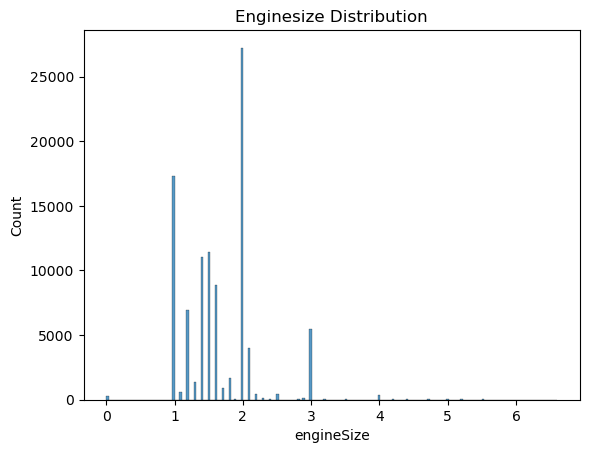

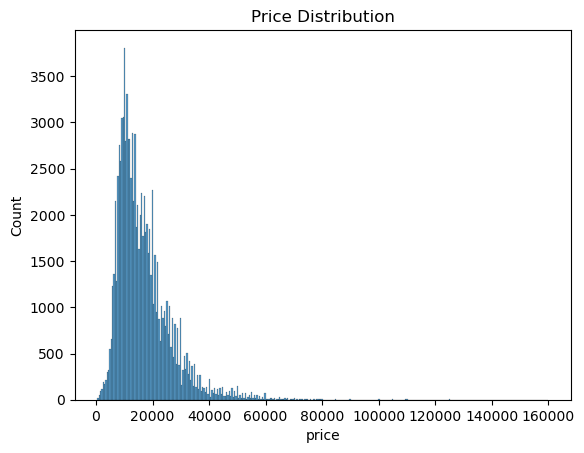

In [21]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(df[i])
    plt.title(f'{i.capitalize()} Distribution')
    plt.show()

> Insight
- Dari grafik diatas, terlihat tidak ada kolom numerik yang terdistribusi normal, dimana sebagian besar kolom terdistribusi right skewed.

`Univariate object`

In [25]:
df.select_dtypes(include='object').columns

Index(['brand', 'model', 'transmission', 'fuelType'], dtype='object')

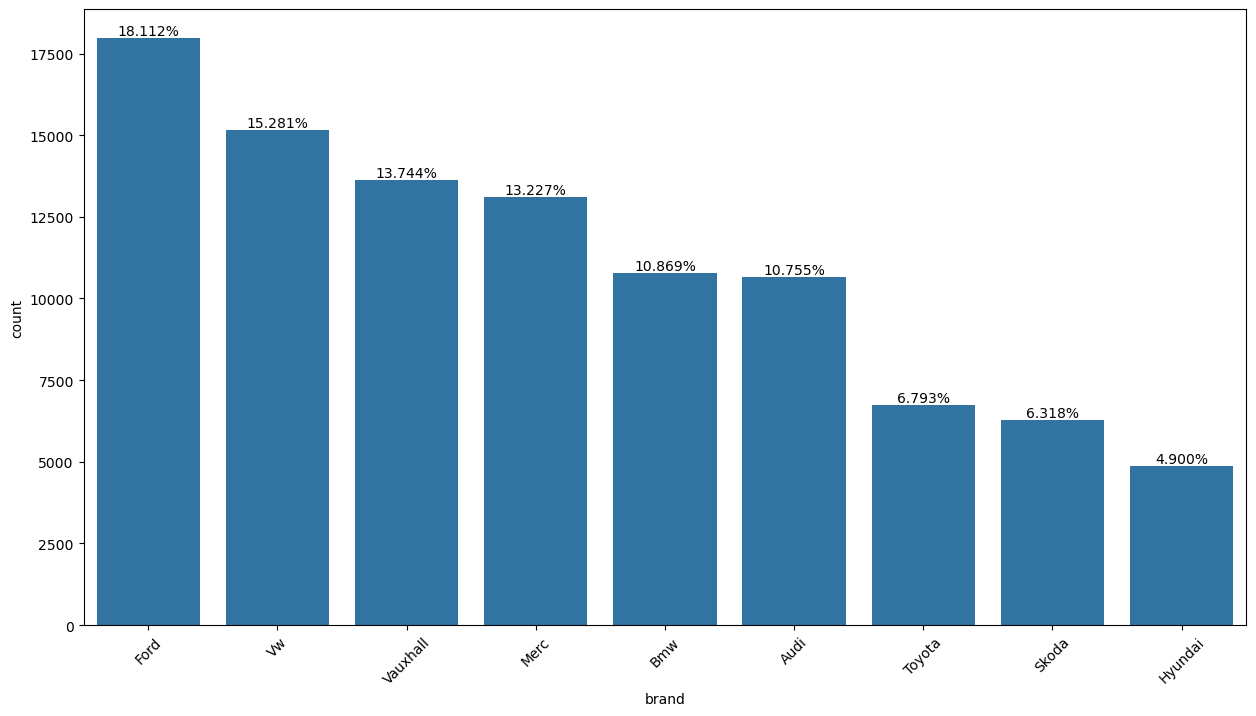

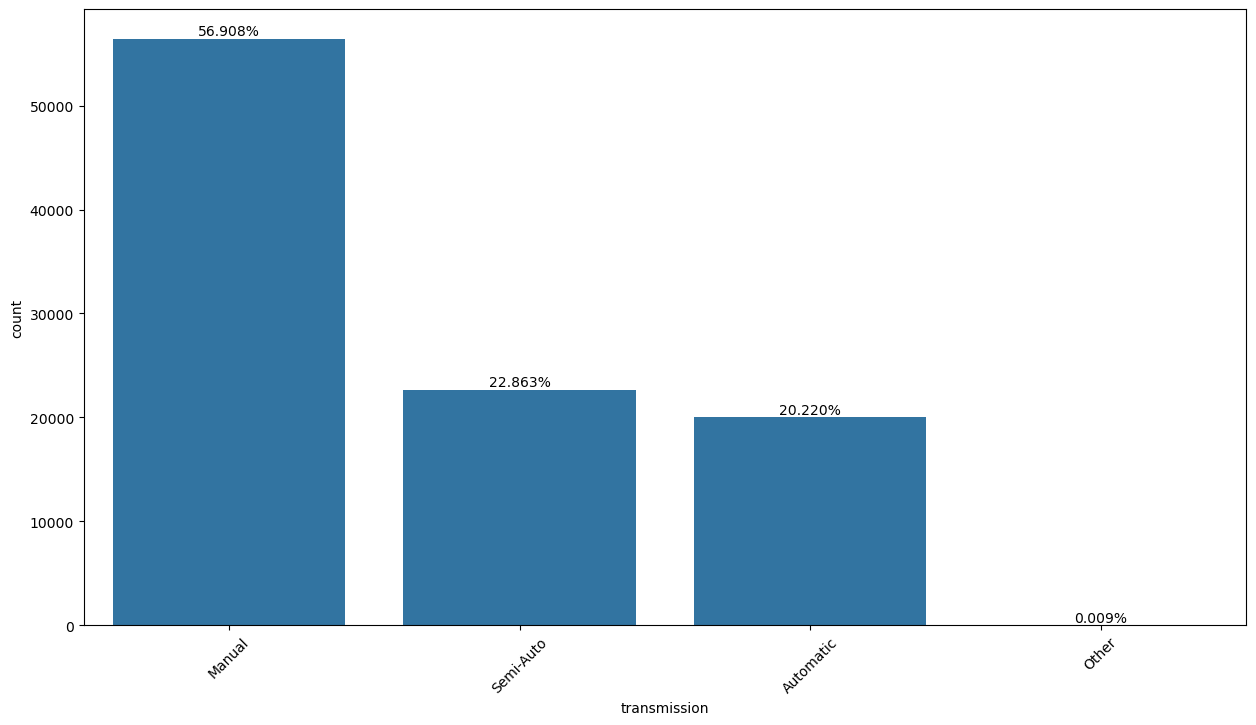

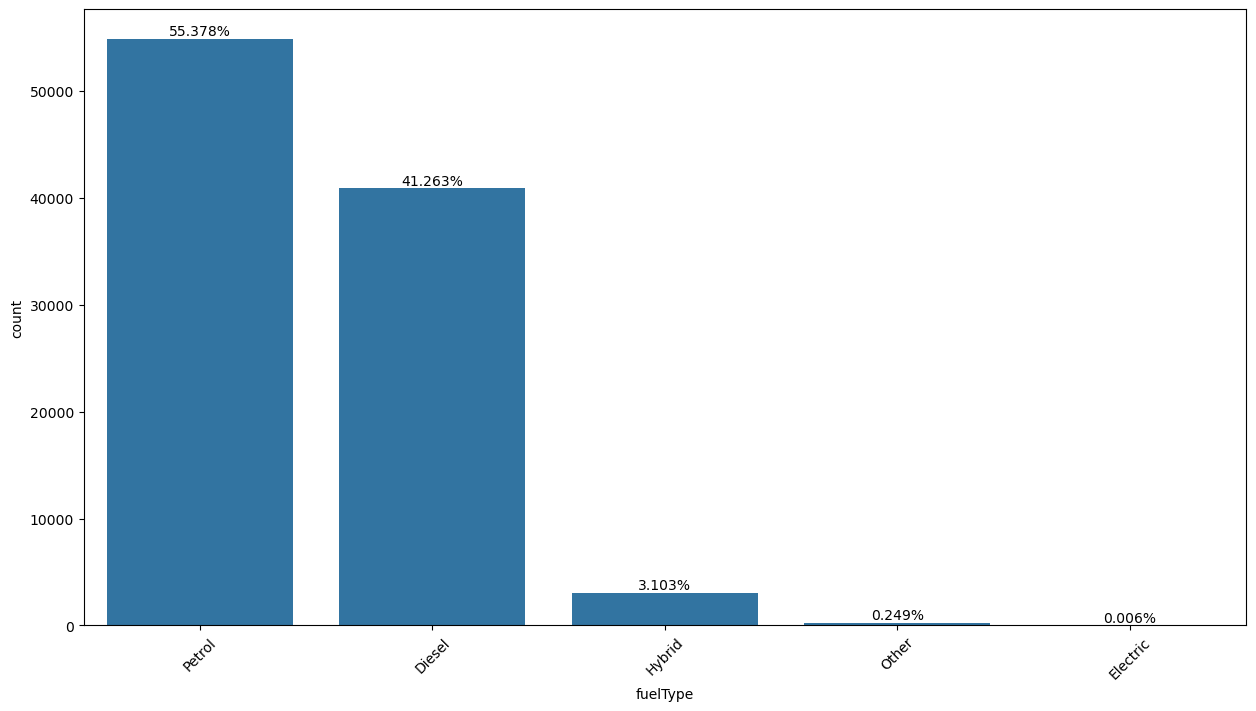

In [374]:
for i in df.drop('model', axis=1).select_dtypes(include='object'):
    plt.figure(figsize=(15, 8), dpi=100)
    
    # Hitung frekuensi nilai dari kolom kategorikal
    count_values = df[i].value_counts(ascending=False)
    
    # Plot countplot dengan urutan sesuai jumlah kemunculan
    ax = sns.countplot(data=df, x=i, order=count_values.index)
    
    # Rotasi label sumbu-x agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Hitung nilai relatif dalam persen
    rel_values = count_values.values / len(df) * 100
    
    # Buat label untuk setiap bar
    lbls = [f'{p:1.3f}%' for p in rel_values]
    
    # Pastikan jumlah bar dan label sama, lalu tambahkan label
    if len(ax.containers[0]) == len(lbls):
        ax.bar_label(container=ax.containers[0], labels=lbls)
    else:
        print(f'Warning: number of bars ({len(ax.containers[0])}) and labels ({len(lbls)}) do not match.')

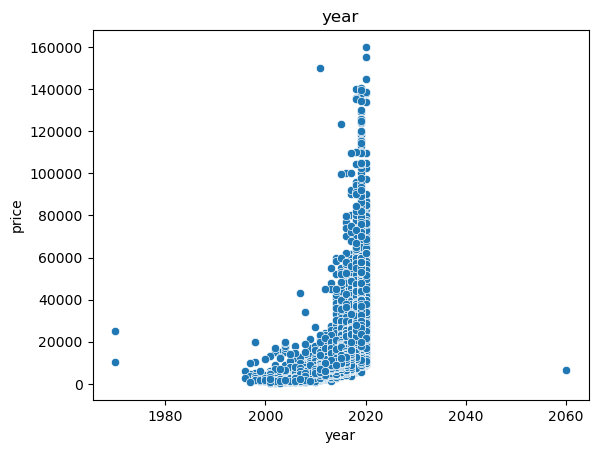

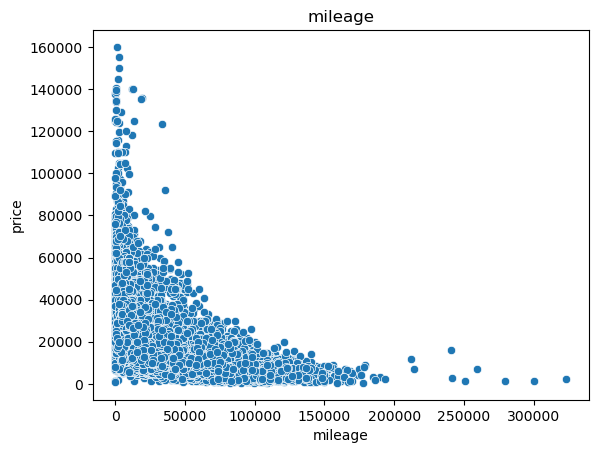

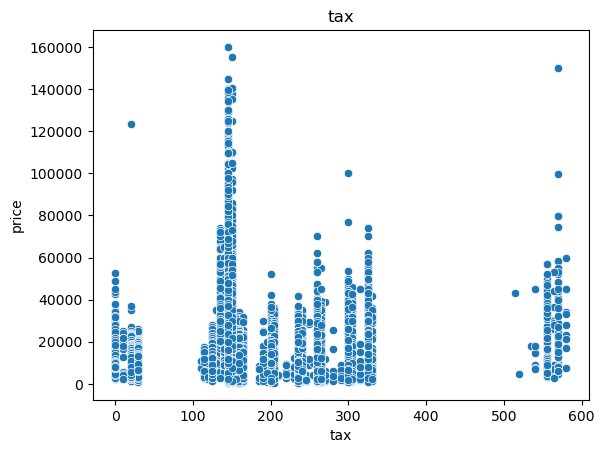

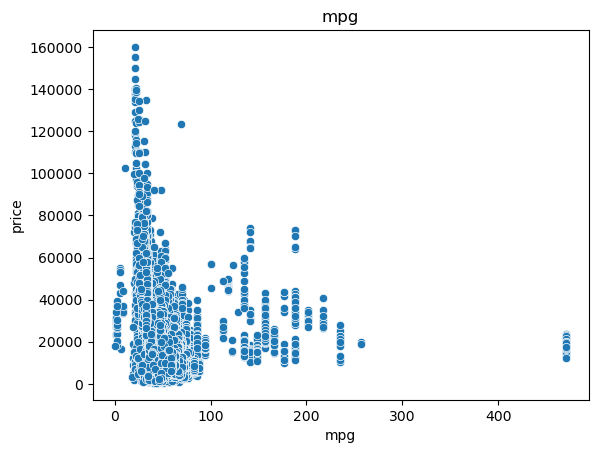

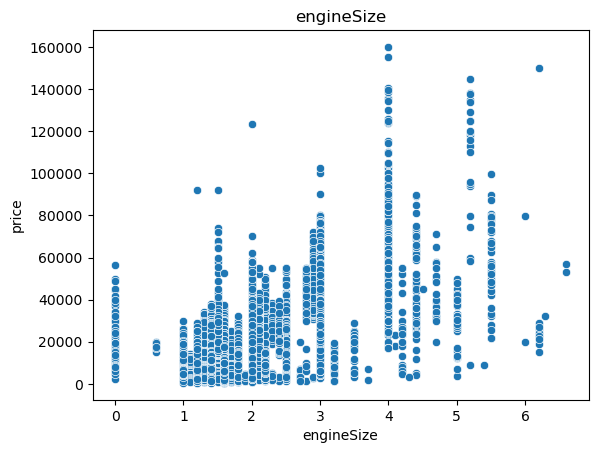

In [326]:
for i in df.drop('price', axis=1).select_dtypes(include='number').columns:
    sns.scatterplot(x=df[i], y=df['price'])
    # sns.regplot(x=df[i], y=df['price'], scatter=False, color='black')
    plt.title(i)
    plt.show()


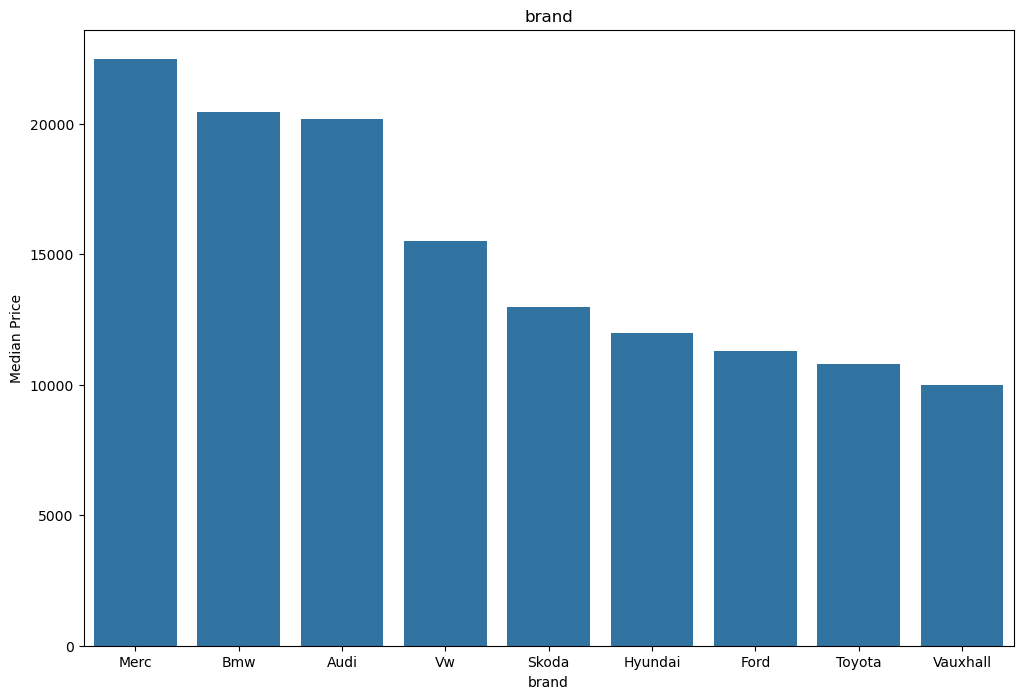

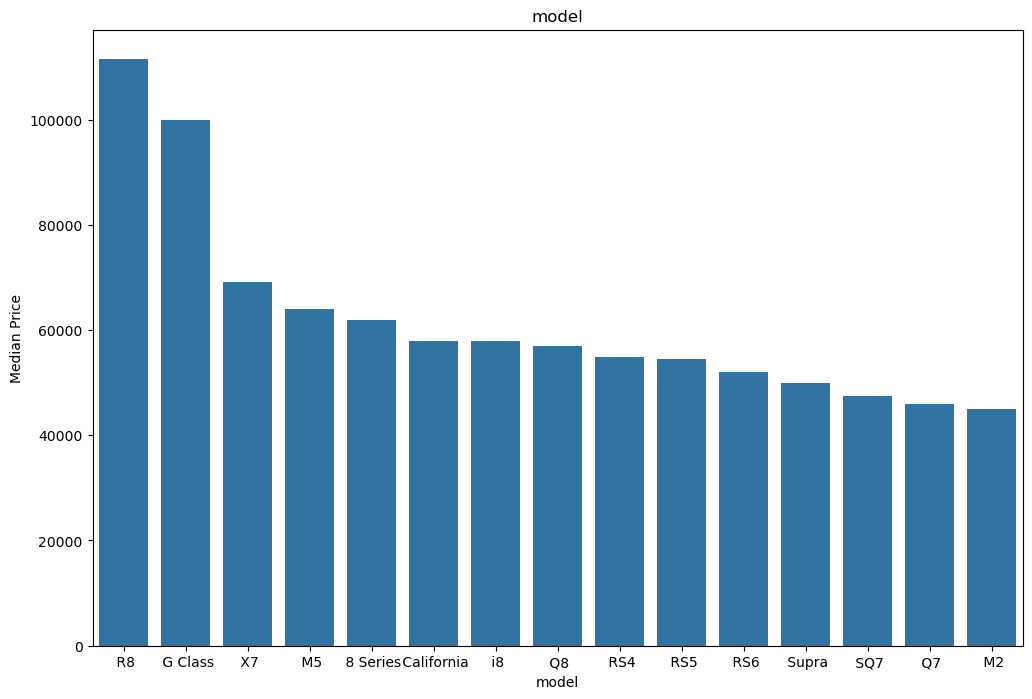

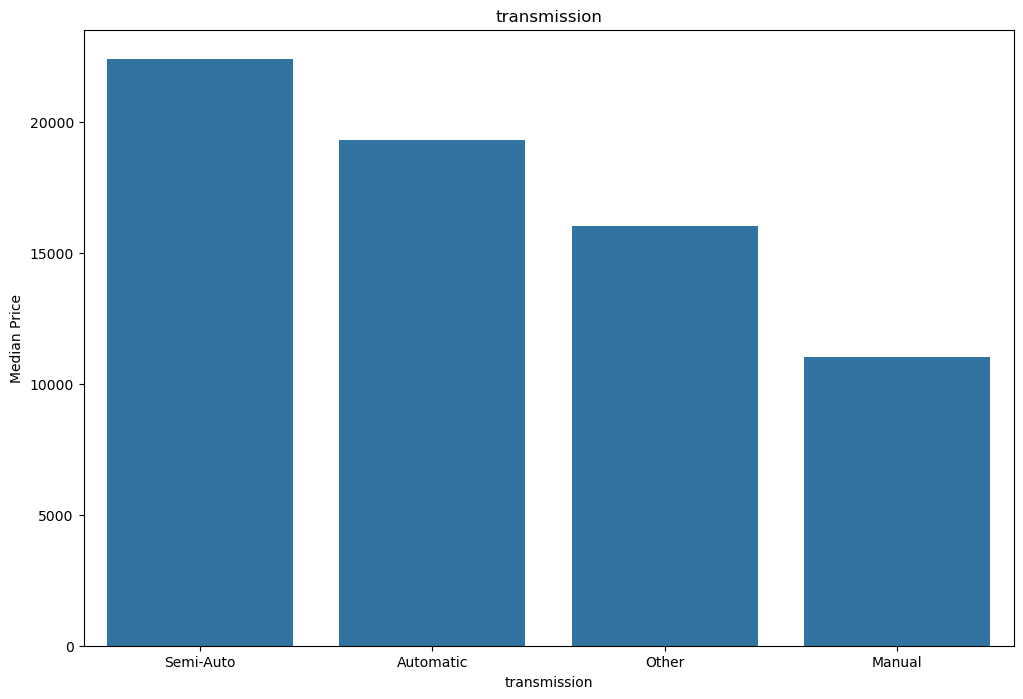

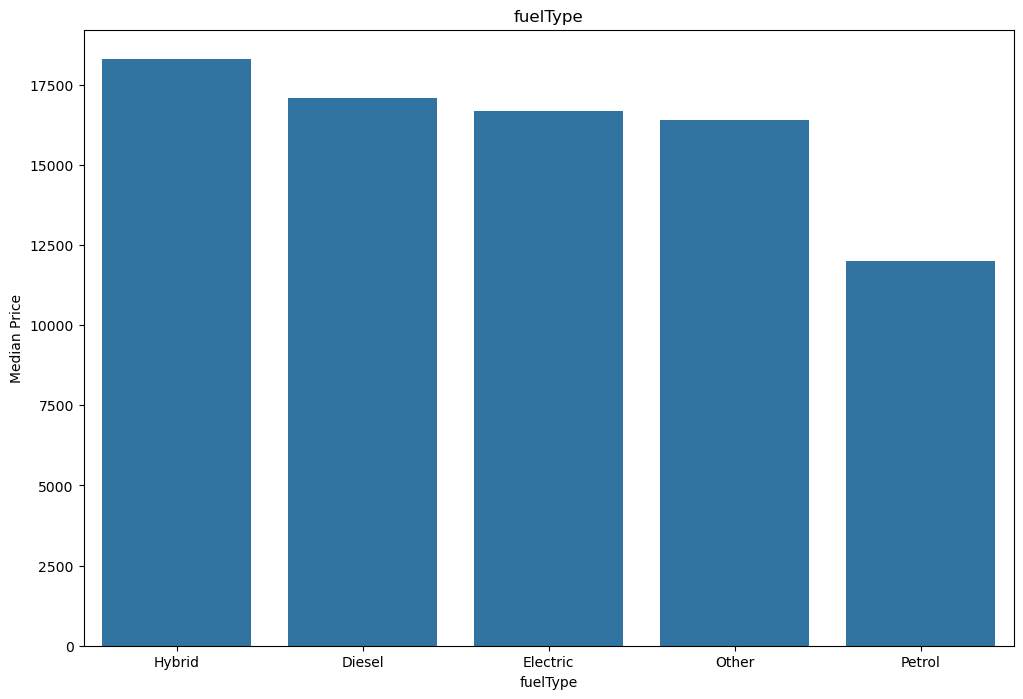

In [328]:
for i in df.select_dtypes(exclude='number').columns:
    if i == 'model':
        agg1=df.groupby(f'{i}')['price'].median().reset_index().sort_values(by='price',ascending=False).head(15)
        plt.figure(figsize=(12,8))
        sns.barplot(data=agg1, x= agg1[i], y=agg1['price'])
        plt.title(f'{i}')
        plt.ylabel('Median Price')
        plt.show()
    else:
        agg1=df.groupby(f'{i}')['price'].median().reset_index().sort_values(by='price',ascending=False)
        plt.figure(figsize=(12,8))
        sns.barplot(data=agg1, x= agg1[i], y=agg1['price'])
        plt.title(f'{i}')
        plt.ylabel('Median Price')
        plt.show()

**`Data Correlation`**

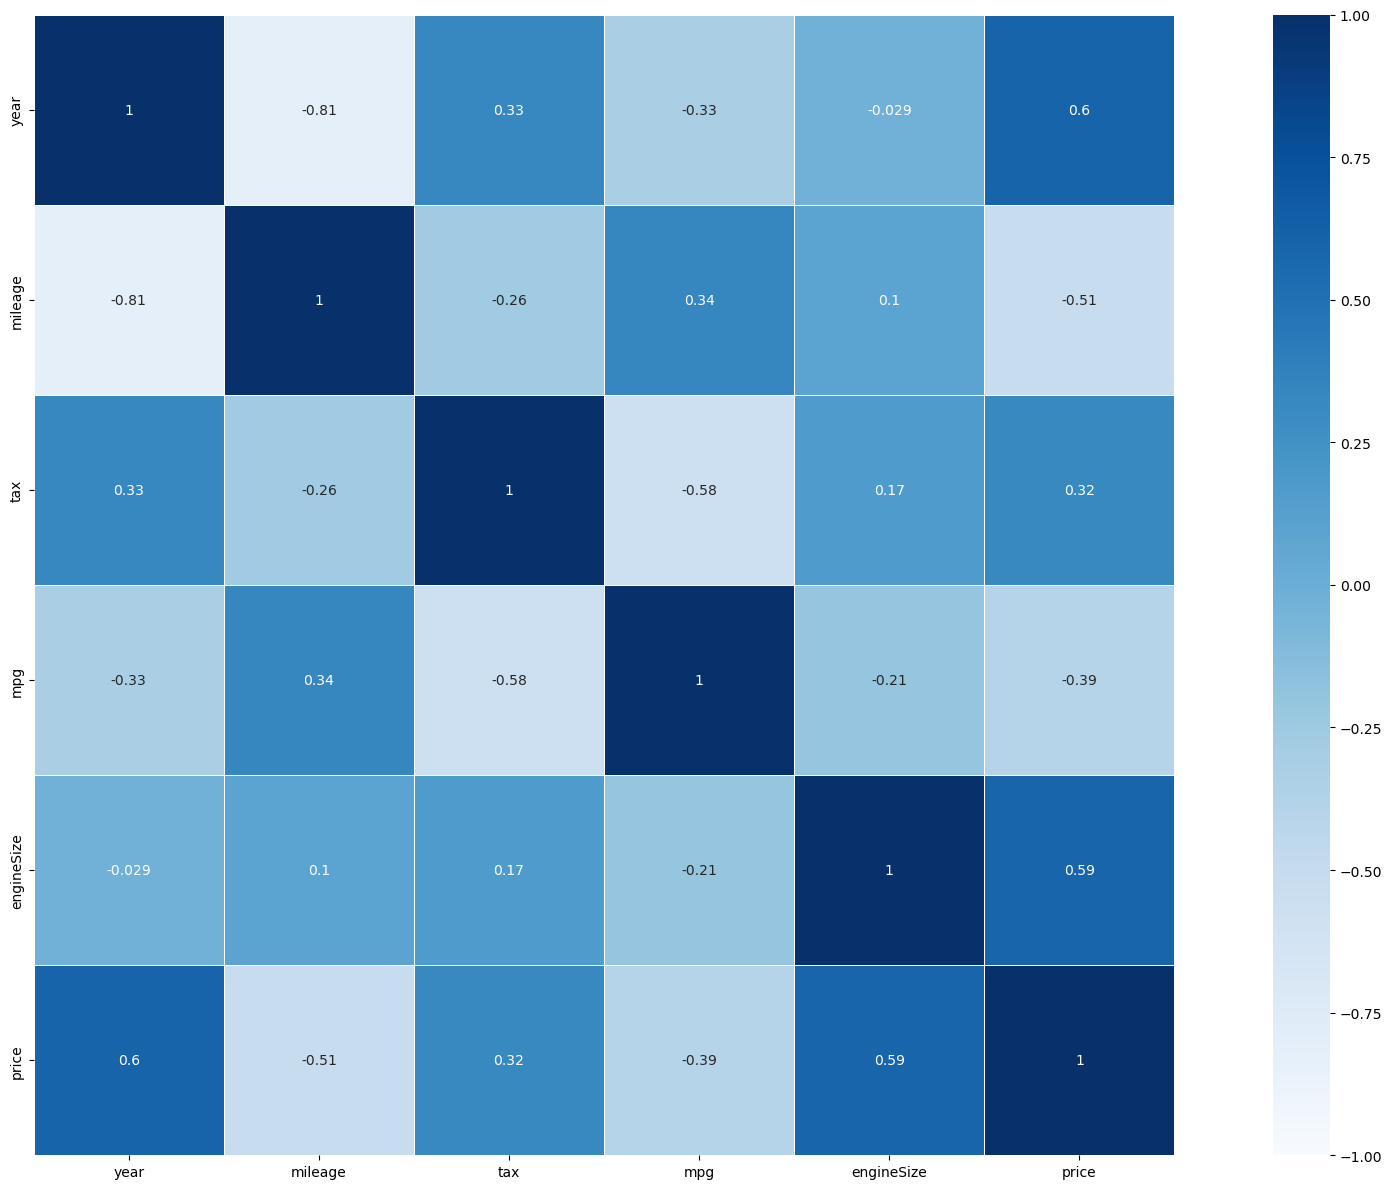

In [330]:
# Plot korelasi
corr = df.select_dtypes(include='number').corr(method='spearman')
plt.figure(figsize=(20,12))
sns.heatmap(corr, cmap='Blues', annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

> insight

- Hubungan yang moderat (sedang) antara target `price` dengan beberapa fitur seperti `mileage` (-5.1),`engineSize` (5.9), dan `year` (0.6)
- Hubungan yang moderat (sedang) antara fitur `tax` dengan fitur `mpg` (-0.58), fitur `year` dengan `milagae` (-0.81) dan `mpg` dengan `year` (-0.51).



In [134]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample().values)]);

df_Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_Desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,brand,object,0,0.0,9,[Vauxhall]
1,model,object,0,0.0,195,[ S5]
2,year,int64,0,0.0,27,[2017]
3,transmission,object,0,0.0,4,[Semi-Auto]
4,mileage,int64,0,0.0,42214,[37249]
5,fuelType,object,0,0.0,5,[Hybrid]
6,tax,int64,0,0.0,48,[555]
7,mpg,float64,0,0.0,208,[68.8]
8,engineSize,float64,0,0.0,40,[0.6]
9,price,int64,0,0.0,13236,[14729]


# 4. Preprocessing

## a. Pengecekan Anomali

In [136]:
df_all = df.copy()

### Anomali pada kolom `model`

In [138]:
# Sebelum Perbaikan
df_all['model'].head().unique()

array([' A1', ' A6', ' A4', ' A3'], dtype=object)

Terdapat  white space pada data kolom `model`, sehingga harus dilakukan perbaikan.

In [140]:
# Setelah perbaikan
df_all['model'] = df_all['model'].str.strip()
df_all['model'].head().unique()

array(['A1', 'A6', 'A4', 'A3'], dtype=object)

### a. Anomali pada kolom `year`

In [142]:
df_all[df_all['year']==1970]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
12072,Merc,M Class,1970,Automatic,14000,Diesel,305,39.2,0.0,24999
10837,Vauxhall,Zafira,1970,Manual,37357,Petrol,200,42.2,1.4,10495


Terdapat 2 mobil dengan tahun registrasi 1970, yaitu Merc M Class dan Vauxhall Zafira.

Untuk Merc Class, terdapat nilai `engineSize` = 0, sehingga akan ditinjau lebih lanjut pada pemeriksaan anomali `engineSize`.

Untuk Vauxhall Zafira, setelah dilakukan pencarian di [autotrader.co.uk](https://www.autotrader.co.uk/car-details/202410014716202?sort=relevance&advertising-location=at_cars&fuel-type=Petrol&include-delivery-option=on&make=Vauxhall&maximum-badge-engine-size=1.4&maximum-mileage=40000&minimum-badge-engine-size=1.4&minimum-mileage=35000&model=Zafira%20Tourer&postcode=e16an&price-from=10000&price-to=11000&radius=1500&transmission=Manual&year-to=2022&fromsra), dengan menggunakkan filter `transmission`, `mileage`, `fuelType`, dan `engineSize` serupa dengan data yang ada, maka didapat tahun registrasinya, yaitu pada tahun 2017.

Sehingga nilai pada kolom `year` akan diubah menjadi 2017.

In [144]:
df_all[df_all['year']==2060]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
17726,Ford,Fiesta,2060,Automatic,54807,Petrol,205,42.8,1.4,6495


Setelah dilakukan pencarian di [autotrader.co.uk](https://www.autotrader.co.uk/car-details/202410165249731?sort=relevance&advertising-location=at_cars&fuel-type=Petrol&make=Ford&maximum-badge-engine-size=1.4&maximum-mileage=60000&minimum-badge-engine-size=1.4&minimum-mileage=50000&model=Fiesta&postcode=e16an&price-from=6000&price-to=6500&transmission=Automatic&fromsra), dengan menggunakkan filter `transmission`, `mileage`, `fuelType`, `price` dan `engineSize` serupa dengan data yang ada, maka didapat tahun registrasinya, yaitu pada tahun 2012.

Sehingga nilai pada kolom `year` akan diubah menjadi 2012.

In [146]:
df_all.loc[17726,'year'] = 2012
df_all.loc[10837,'year'] = 2017
df_all[(df_all['year']==2060) | (df_all['year']==1970)]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
12072,Merc,M Class,1970,Automatic,14000,Diesel,305,39.2,0.0,24999


### Anomali pada kolom `tax`

In [148]:
df_all[df_all['tax']==0]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
30,Audi,A1,2015,Automatic,54754,Diesel,0,76.3,1.6,9500
50,Audi,A4,2016,Manual,52561,Diesel,0,74.3,2.0,12750
58,Audi,A3,2016,Manual,66369,Diesel,0,83.1,1.6,10200
60,Audi,A1,2013,Manual,76269,Diesel,0,74.3,1.6,7000
69,Audi,A1,2016,Manual,18181,Petrol,0,67.3,1.0,10800
...,...,...,...,...,...,...,...,...,...,...
14694,Vw,Golf SV,2016,Manual,16739,Diesel,0,72.4,1.6,10550
14696,Vw,Golf SV,2015,Manual,45000,Diesel,0,72.4,1.6,8950
14701,Vw,Golf SV,2015,Manual,21151,Diesel,0,72.4,1.6,9695
14721,Vw,Golf SV,2014,Manual,32535,Diesel,0,72.4,1.6,8650


In [149]:
100 * len(df_all[df_all['tax']==0])/len(df_all)

6.345589643804128

Berdasarkan peraturan dari Pemeringtah Inggris yang dilansir dari situs [Vehicle tax rates](https://www.gov.uk/vehicle-tax-rate-tables/rates-for-cars-registered-on-or-after-1-march-2001), [Vehicles exempt from vehicle tax](https://www.gov.uk/vehicle-exempt-from-vehicle-tax) dan [Historic vehicles](https://www.gov.uk/historic-vehicles), terdapat beberapa keadaan yang memungkinkan nilai `tax` suatu kendaraan sama dengan 0:
1. Kendaraan digunakan oleh penyandang disabilitas.
1. Kendaraan dengan usia lebih dari 40 tahun.
1. Kendaraan dengan emisi kurang dari 100g/km, untuk kedaraan yang diregistrasi pada tanggal 1 Maret 2001 sampai 31 Maret 2017.
1. Kendaraan dengan emisi 0g/km (kendaraan listrik dan kendaraan bahan bakar hidrogen) dengan harga dibawah 40.000 Poundsterling untuk kedaraan yang diregistrasi pada tanggal 1 April 2017 dan setelahnya.

Sehingga dapat disimpulkan, nilai 0 pada kolom `tax` bukan anomali.

### Anomali pada kolom `engineSize`

In [152]:
df_es_0_el = df_all[(df_all['engineSize']==0) & (df_all['fuelType']=='Electric')]
df_es_0_el

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
8375,Bmw,i3,2017,Automatic,20321,Electric,135,470.8,0.0,18999
8400,Bmw,i3,2016,Automatic,9990,Electric,0,470.8,0.0,18999


In [153]:
df_es_0 = df_all[(df_all['engineSize']==0) & (df_all['fuelType']!='Electric')]
df_es_0

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
7505,Audi,Q5,2019,Automatic,5886,Petrol,135,117.7,0.0,44790
7506,Audi,Q3,2019,Automatic,1500,Diesel,145,47.1,0.0,32788
7516,Audi,Q3,2020,Manual,1500,Petrol,145,40.9,0.0,29944
7517,Audi,Q3,2020,Automatic,1500,Diesel,145,47.1,0.0,33333
7518,Audi,Q3,2020,Automatic,1500,Petrol,145,32.5,0.0,29944
...,...,...,...,...,...,...,...,...,...,...
11648,Vw,Tiguan,2016,Manual,38398,Diesel,145,53.3,0.0,15300
11655,Vw,Tiguan,2018,Automatic,22200,Diesel,145,47.9,0.0,24000
12821,Vw,Up,2017,Manual,20324,Petrol,20,64.2,0.0,8500
12879,Vw,Up,2017,Manual,24444,Petrol,20,60.1,0.0,8000


In [154]:
print(f'Jumlah mobil dengan `engineSize`=0 sebanyak {len(df_es_0)}, dengan persentase sebesar {100*len(df_es_0)/len(df_all)} %')

Jumlah mobil dengan `engineSize`=0 sebanyak 271, dengan persentase sebesar 0.2732212890802222 %


Jumlah mobil dengan nilai `engineSize` = 0, dan bukan mobil listrik ada sebanyak 271 dengan persentase sebesar 0.27 %. Karena jumlahnya yang sedikit, paka baris dengan nilai `engineSize` = 0, dan bukan mobil listrik akan didrop.

In [156]:
df_all = df_all[~((df_all['engineSize'] == 0) & (df_all['fuelType'] != 'Electric'))]


### Anomali pada kolom `transmission`

In [158]:
# Flag rows with 'Other' in the transmission column for review
df_other_transmissions = df_all[df_all['transmission'] == 'Other']

# Display the flagged rows for review
df_other_transmissions_info = df_other_transmissions[['brand', 'model', 'year', 'transmission']]
flagged_count = df_other_transmissions.shape

df_other_transmissions_info, flagged_count


(          brand   model  year transmission
 4739    Hyundai   Ioniq  2017        Other
 4761    Hyundai  Tucson  2017        Other
 12762      Merc     SLK  2015        Other
 6126      Skoda   Scala  2019        Other
 2458     Toyota   Yaris  2015        Other
 6704   Vauxhall   Mokka  2019        Other
 7319   Vauxhall   Mokka  2019        Other
 7422   Vauxhall   Mokka  2019        Other,
 (8, 10))

merubah data `transmission` other dengan `model` dan `year` yang sama.

In [160]:
# Check if there are cars with the same model and year as the flagged "Other" transmission entries
# This will help identify if these entries could be matched with known transmission types

# Extract unique model-year combinations from the flagged entries
flagged_combinations = df_other_transmissions[['model', 'year']].drop_duplicates()

# Check for matching records with the same model and year but different transmission types
matching_records = df_all.merge(flagged_combinations, on=['model', 'year'])
matching_records = matching_records[matching_records['transmission'] != 'Other']

# Display the matching records for review
matching_records[['brand', 'model', 'year', 'transmission']].head(), matching_records.shape[0]


(     brand   model  year transmission
 0  Hyundai  Tucson  2017       Manual
 1  Hyundai  Tucson  2017    Semi-Auto
 2  Hyundai  Tucson  2017       Manual
 3  Hyundai  Tucson  2017       Manual
 4  Hyundai  Tucson  2017       Manual,
 813)

In [161]:

# Create a dictionary mapping each (model, year) to the most common transmission in the matching records
common_transmissions_for_flagged = (
    matching_records.groupby(['model', 'year'])['transmission']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Replace "Other" transmissions in the main data with the matched transmissions from the dictionary
df_all['transmission'] = df_all.apply(
    lambda row: common_transmissions_for_flagged.get((row['model'], row['year']), row['transmission'])
    if row['transmission'] == 'Other' else row['transmission'],
    axis=1
)

# Confirm if any "Other" values remain in the transmission column
remaining_other_transmission_count = df_all[df_all['transmission'] == 'Other'].shape[0]
remaining_other_transmission_count


0

### Anomali pada kolom `fuelType`

In [163]:
df_fueltype_other = df_all[(df_all['fuelType'] == 'Other') & (df_all['model'] != 'i3')]
df_fueltype_other

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
16,Bmw,3 Series,2017,Automatic,55594,Other,135,148.7,2.0,14250
35,Bmw,2 Series,2017,Automatic,61818,Other,0,141.2,1.5,13000
86,Bmw,2 Series,2017,Automatic,32389,Other,0,141.2,1.5,16000
118,Bmw,X5,2016,Automatic,71626,Other,0,85.6,2.0,21000
138,Bmw,3 Series,2017,Automatic,43703,Other,140,134.5,2.0,17950
...,...,...,...,...,...,...,...,...,...,...
13854,Vw,Touareg,2015,Automatic,59115,Other,235,42.8,3.0,19995
14098,Vw,Arteon,2019,Automatic,1413,Other,150,50.4,2.0,24989
14102,Vw,Arteon,2019,Automatic,3500,Other,145,47.1,2.0,27495
14436,Vw,Touran,2019,Automatic,4305,Other,145,38.7,1.5,25990


In [164]:
matching_records_other_fueltype = df_all.merge(
    df_fueltype_other[['model', 'year', 'engineSize']].drop_duplicates(),
    on=['model', 'year', 'engineSize']
)
matching_records_other_fueltype = matching_records_other_fueltype[matching_records_other_fueltype['fuelType'] != 'Other']

display(df_fueltype_other[['model', 'year', 'engineSize', 'fuelType']], matching_records_other_fueltype[['model', 'year', 'engineSize', 'fuelType']])


,model,year,engineSize,fuelType
16,3 Series,2017,2.0,Other
35,2 Series,2017,1.5,Other
86,2 Series,2017,1.5,Other
118,X5,2016,2.0,Other
138,3 Series,2017,2.0,Other
...,...,...,...,...
13854,Touareg,2015,3.0,Other
14098,Arteon,2019,2.0,Other
14102,Arteon,2019,2.0,Other
14436,Touran,2019,1.5,Other


,model,year,engineSize,fuelType
0,3 Series,2017,2.0,Diesel
2,3 Series,2017,2.0,Diesel
3,3 Series,2016,2.0,Diesel
4,3 Series,2016,2.0,Diesel
5,X5,2016,2.0,Diesel
...,...,...,...,...
13952,Touran,2019,1.5,Petrol
13953,Touran,2019,1.5,Petrol
13954,Touran,2019,1.5,Petrol
13955,Touran,2019,1.5,Petrol


In [165]:
common_fuel_types = (
    matching_records_other_fueltype.groupby(['model', 'year', 'engineSize'])['fuelType']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Update the "Other" fuel types in the original data
df_all['fuelType'] = df_all.apply(
    lambda row: common_fuel_types[(row['model'], row['year'], row['engineSize'])] 
    if row['fuelType'] == 'Other' and (row['model'], row['year'], row['engineSize']) in common_fuel_types 
    else row['fuelType'],
    axis=1
)

# Verify that "Other" entries have been updated
df_all[df_all['fuelType'] == 'Other']


,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
32,Bmw,i3,2016,Automatic,25269,Other,0,470.8,0.6,17100
8188,Bmw,i3,2015,Automatic,59000,Other,0,470.8,0.6,14940
8620,Bmw,i3,2017,Automatic,32867,Other,0,470.8,0.6,19300
10080,Bmw,i3,2017,Automatic,19178,Other,0,470.8,0.6,20000
10086,Bmw,i3,2017,Automatic,23956,Other,135,470.8,0.6,19500
10325,Bmw,i3,2016,Automatic,41063,Other,0,470.8,0.6,17000
10530,Bmw,i3,2017,Automatic,50867,Other,135,470.8,0.6,17600
6239,Toyota,Prius,2011,Manual,112000,Other,0,70.6,1.8,7250


In [166]:
common_fuel_types_extrapolated = (
    df_all[df_all['fuelType'] != 'Other']
    .groupby(['model', 'year', 'engineSize'])['fuelType']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Replace the remaining 'Other' values based on the most common fuel type in the dataset for each model, year, and engine size
df_all['fuelType'] = df_all.apply(
    lambda row: common_fuel_types_extrapolated.get((row['model'], row['year'], row['engineSize']), row['fuelType'])
    if (row['fuelType'] == 'Other') & (row['model'] != 'i3') else row['fuelType'],
    axis=1
)

# Verify that no 'Other' fuel types remain
df_all[df_all['fuelType'] == 'Other']

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
32,Bmw,i3,2016,Automatic,25269,Other,0,470.8,0.6,17100
8188,Bmw,i3,2015,Automatic,59000,Other,0,470.8,0.6,14940
8620,Bmw,i3,2017,Automatic,32867,Other,0,470.8,0.6,19300
10080,Bmw,i3,2017,Automatic,19178,Other,0,470.8,0.6,20000
10086,Bmw,i3,2017,Automatic,23956,Other,135,470.8,0.6,19500
10325,Bmw,i3,2016,Automatic,41063,Other,0,470.8,0.6,17000
10530,Bmw,i3,2017,Automatic,50867,Other,135,470.8,0.6,17600
6239,Toyota,Prius,2011,Manual,112000,Other,0,70.6,1.8,7250


In [167]:
df_all.loc[(df_all['model'] == 'Prius'), 'fuelType'] = 'Hybrid'
df_all[df_all['fuelType']=='Other']

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
32,Bmw,i3,2016,Automatic,25269,Other,0,470.8,0.6,17100
8188,Bmw,i3,2015,Automatic,59000,Other,0,470.8,0.6,14940
8620,Bmw,i3,2017,Automatic,32867,Other,0,470.8,0.6,19300
10080,Bmw,i3,2017,Automatic,19178,Other,0,470.8,0.6,20000
10086,Bmw,i3,2017,Automatic,23956,Other,135,470.8,0.6,19500
10325,Bmw,i3,2016,Automatic,41063,Other,0,470.8,0.6,17000
10530,Bmw,i3,2017,Automatic,50867,Other,135,470.8,0.6,17600


### c. Anomali pada kolom `model` dengan `fuelType`

In [169]:
df_all[df_all['model']=='i3']

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
32,Bmw,i3,2016,Automatic,25269,Other,0,470.8,0.6,17100
8188,Bmw,i3,2015,Automatic,59000,Other,0,470.8,0.6,14940
8375,Bmw,i3,2017,Automatic,20321,Electric,135,470.8,0.0,18999
8400,Bmw,i3,2016,Automatic,9990,Electric,0,470.8,0.0,18999
8620,Bmw,i3,2017,Automatic,32867,Other,0,470.8,0.6,19300
8835,Bmw,i3,2015,Automatic,29465,Electric,0,470.8,1.0,17400
10080,Bmw,i3,2017,Automatic,19178,Other,0,470.8,0.6,20000
10086,Bmw,i3,2017,Automatic,23956,Other,135,470.8,0.6,19500
10325,Bmw,i3,2016,Automatic,41063,Other,0,470.8,0.6,17000
10530,Bmw,i3,2017,Automatic,50867,Other,135,470.8,0.6,17600


Terdapat 2 jenis dari BMW i3, yaitu full electric dan range extender. Dimana pada BMW i3 range extender, terdapat mesin kapasitas 0.6 liter yang digunakan untuk mengisi baterai. Maka BMW dengan `engineSize` 0.6 akan diubah `fuelType` menjadi Hybrid.

Lalu terdapat BMW i3 dengan `fuelType` Electric dengan `engineSize` 1. Karena fueltype = electric, maka engineSize akan dirubah menjadi 0.

In [171]:
df_all.loc[(df_all['model'] == 'i3') & (df_all['engineSize'] == 0.6) & (df_all['fuelType'] == 'Other'), 'fuelType'] = 'Hybrid'

df_all[(df_all['model'] == 'i3') & (df_all['engineSize'] == 0.6)]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
32,Bmw,i3,2016,Automatic,25269,Hybrid,0,470.8,0.6,17100
8188,Bmw,i3,2015,Automatic,59000,Hybrid,0,470.8,0.6,14940
8620,Bmw,i3,2017,Automatic,32867,Hybrid,0,470.8,0.6,19300
10080,Bmw,i3,2017,Automatic,19178,Hybrid,0,470.8,0.6,20000
10086,Bmw,i3,2017,Automatic,23956,Hybrid,135,470.8,0.6,19500
10325,Bmw,i3,2016,Automatic,41063,Hybrid,0,470.8,0.6,17000
10530,Bmw,i3,2017,Automatic,50867,Hybrid,135,470.8,0.6,17600


In [172]:
df_all.loc[(df_all['model'] == 'i3') & (df_all['engineSize'] == 1) & (df_all['fuelType'] == 'Electric'), 'engineSize'] = 0

# Display the updated rows for verification
df_all[(df_all['model'] == 'i3') & (df_all['engineSize'] == 0.6)]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
32,Bmw,i3,2016,Automatic,25269,Hybrid,0,470.8,0.6,17100
8188,Bmw,i3,2015,Automatic,59000,Hybrid,0,470.8,0.6,14940
8620,Bmw,i3,2017,Automatic,32867,Hybrid,0,470.8,0.6,19300
10080,Bmw,i3,2017,Automatic,19178,Hybrid,0,470.8,0.6,20000
10086,Bmw,i3,2017,Automatic,23956,Hybrid,135,470.8,0.6,19500
10325,Bmw,i3,2016,Automatic,41063,Hybrid,0,470.8,0.6,17000
10530,Bmw,i3,2017,Automatic,50867,Hybrid,135,470.8,0.6,17600


In [173]:
df_all = df_all[df_all['fuelType']!='Electric']
df_all[df_all['fuelType']=='Electric']

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price


## b. Pemeriksaan duplikat

In [175]:
# Menampilkan baris yang duplikat
df_duplikat = df_all[df_all.duplicated(keep=False)].sort_values(by='price')
df_duplikat


,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
15685,Ford,KA,2008,Manual,63000,Petrol,160,45.6,1.3,1795
15684,Ford,KA,2008,Manual,63000,Petrol,160,45.6,1.3,1795
12444,Vw,Up,2014,Manual,49160,Petrol,20,62.8,1.0,4330
12502,Vw,Up,2014,Manual,49160,Petrol,20,62.8,1.0,4330
4379,Hyundai,I30,2015,Manual,124000,Diesel,0,78.4,1.6,4492
...,...,...,...,...,...,...,...,...,...,...
2956,Merc,S Class,2020,Semi-Auto,3999,Diesel,145,40.4,3.0,64980
4999,Audi,RS5,2019,Automatic,6000,Petrol,145,29.7,2.9,66990
3997,Audi,RS5,2019,Automatic,6000,Petrol,145,29.7,2.9,66990
4487,Merc,GLC Class,2019,Semi-Auto,1998,Petrol,145,21.6,4.0,74980


Terdapar 2449 data duplikat, sehingga harus dilakukan drop duplicated agar data tidak bias.

In [177]:
df_all = df_all.drop_duplicates()

# Menampilkan baris yang duplikat
df_duplikat = df_all[df_all.duplicated(keep=False)].sort_values(by='price')
df_duplikat

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price


## c. Pemeriksaan Missing Value

In [179]:
df_all.isna().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

Tidak terdapat missing value pada dataset.

## d. Pengecekan Outlier

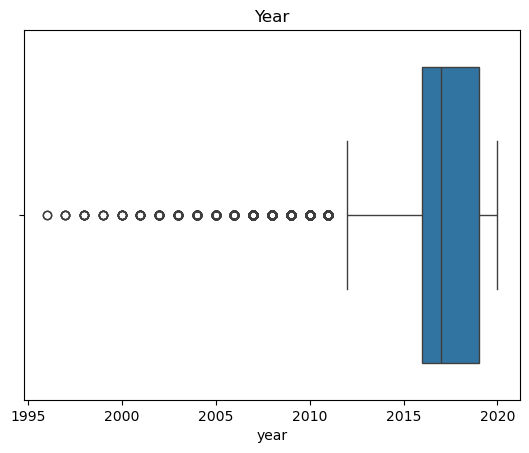

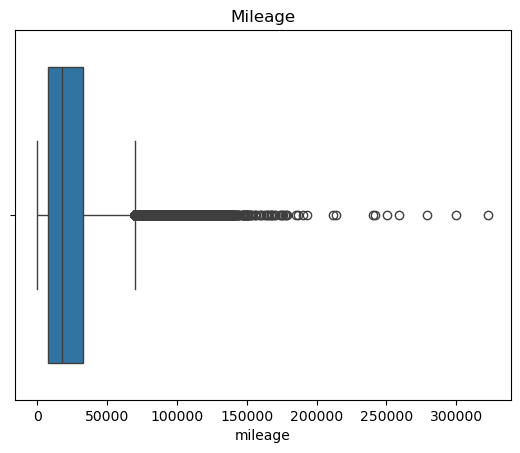

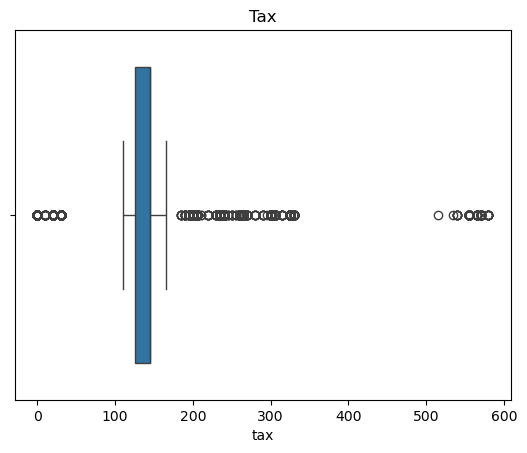

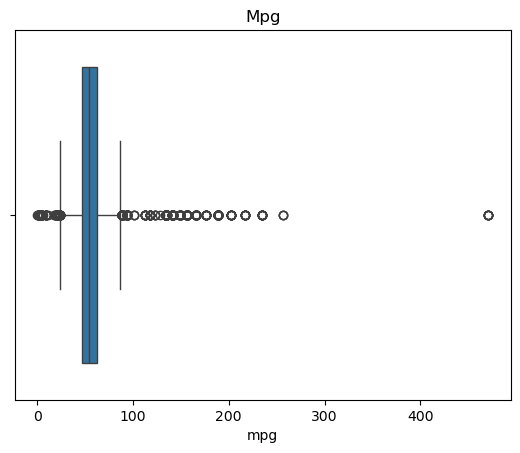

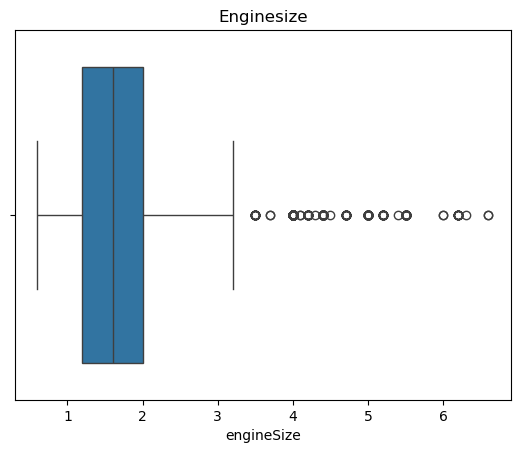

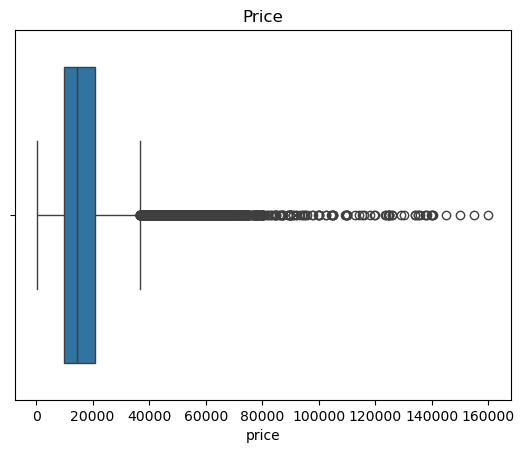

In [182]:
for i in df_all.select_dtypes(include='number').columns:
    sns.boxplot(x=df_all[i], orient='h')
    plt.title(f'{i.capitalize()}')
    plt.show()

Terlihat pada boxplot, terdapat extreme outlier pada kolom `tax` dan `mpg`, 

In [184]:
Q1 = df_all['tax'].quantile(0.25)
Q3 = df_all['tax'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_all = df_all[(df_all['tax']<400)]

In [185]:
Q1 = df_all['mpg'].quantile(0.25)
Q3 = df_all['mpg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_all = df_all[(df_all['mpg']<400)]

## Overprice or Underprice check

Melakukan pengecekan apakah terdapat mobil bekas yang terlalu mahal atau atau terlalu murah, dinilai dari batas atas dan batas bawah outlier, berdasarkan mobil dengan model dan tahun yang sama.

In [188]:
Q1 = df_all.groupby(['model', 'year'])['price'].quantile(0.25)
Q3 = df_all.groupby(['model', 'year'])['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# pd.DataFrame(lower_bound)
df_all = pd.merge(df_all, lower_bound, on=['model', 'year'], how='left')
df_all = pd.merge(df_all, upper_bound, on=['model', 'year'], how='left')
df_all.rename(columns={'price': 'UpperBound','price_x': 'price','price_y': 'LowerBound'}, inplace=True)
df_all['overprice'] = df_all['price'] > df_all['UpperBound']
df_all['underprice'] = df_all['price'] < df_all['LowerBound']
df_all

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,LowerBound,UpperBound,overprice,underprice
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500,8238.750,18248.750,False,False
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500,10743.500,24751.500,False,False
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000,7845.000,16253.000,False,False
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800,11378.625,24491.625,False,False
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300,16037.500,29577.500,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97254,Vw,Eos,2012,Manual,74000,Diesel,125,58.9,2.0,5990,5990.000,5990.000,False,False
97255,Vw,Fox,2008,Manual,88102,Petrol,145,46.3,1.2,1799,1799.000,1799.000,False,False
97256,Vw,Fox,2009,Manual,70000,Petrol,200,42.0,1.4,1590,1590.000,1590.000,False,False
97257,Vw,Fox,2006,Manual,82704,Petrol,150,46.3,1.2,1250,1250.000,1250.000,False,False


In [189]:
# print(f'df_all[(df_all['overprice']==True) & (df_all['underprice']==True)]')

In [190]:
df_all = df_all[(df_all['overprice']==False) & (df_all['underprice']==False)]
df_all = df_all.drop(['UpperBound','LowerBound','overprice','underprice'], axis=1)
df_all

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300
...,...,...,...,...,...,...,...,...,...,...
97254,Vw,Eos,2012,Manual,74000,Diesel,125,58.9,2.0,5990
97255,Vw,Fox,2008,Manual,88102,Petrol,145,46.3,1.2,1799
97256,Vw,Fox,2009,Manual,70000,Petrol,200,42.0,1.4,1590
97257,Vw,Fox,2006,Manual,82704,Petrol,150,46.3,1.2,1250


In [350]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Misalkan df_all adalah DataFrame yang berisi fitur numerik
# Pastikan df_all hanya berisi kolom numerik sebelum menghitung VIF
numerical_features = df_all.select_dtypes(include='number')

# Standardisasi data untuk menghitung VIF dengan lebih stabil
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Menghitung VIF untuk setiap fitur
vif_df = pd.DataFrame()
vif_df['Feature'] = numerical_features.columns
vif_df['VIF'] = [variance_inflation_factor(scaled_numerical_features, i) for i in range(scaled_numerical_features.shape[1])]

# Menampilkan hasil
vif_df


,Feature,VIF
0,year,2.782165
1,mileage,2.588515
2,tax,1.465229
3,mpg,1.455547
4,engineSize,2.701175
5,price,3.623073


In [248]:
# Function to calculate p-value from Chi-Square test
def chi_square_test(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# Create a matrix to store p-values for each pair of categorical features
chi_square_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for i in categorical_features:
    for j in categorical_features:
        if i == j:
            chi_square_matrix.loc[i, j] = np.nan  # no need to test self-association
        else:
            chi_square_matrix.loc[i, j] = chi_square_test(df_all[i], df_all[j])

# Display the Cramér's V matrix
chi_square_matrix

,brand,model,transmission,fuelType
brand,NaN,0.0,0.0,0.0
model,0.0,NaN,0.0,0.0
transmission,0.0,0.0,NaN,0.0
fuelType,0.0,0.0,0.0,NaN


In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample().values)]);

df_Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_Desc

In [249]:
listItem = []
for col in df_all.columns :
    listItem.append([col, df_all[col].dtype, df_all[col].isna().sum(), round((df_all[col].isna().sum()/len(df_all[col])) * 100,2),
                    df_all[col].nunique(), list(df_all[col].drop_duplicates().sample().values)]);

df_all_Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_all_Desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,brand,object,0,0.0,9,[Merc]
1,model,object,0,0.0,191,[Zafira Tourer]
2,year,int64,0,0.0,25,[2003]
3,transmission,object,0,0.0,3,[Manual]
4,mileage,int64,0,0.0,41583,[17359]
5,fuelType,object,0,0.0,3,[Petrol]
6,tax,int64,0,0.0,40,[135]
7,mpg,float64,0,0.0,193,[22.2]
8,engineSize,float64,0,0.0,33,[1.7]
9,price,int64,0,0.0,12732,[51490]


In [250]:
df_all.describe()

,year,mileage,tax,mpg,engineSize,price
count,94123.000000,94123.000000,94123.000000,94123.000000,94123.000000,94123.000000
mean,2017.072214,23293.271708,118.386101,55.393070,1.649337,16440.000595
std,2.092129,20872.305370,60.462220,13.342128,0.521504,9272.974904
min,1996.000000,1.000000,0.000000,0.300000,1.000000,450.000000
25%,2016.000000,7850.000000,125.000000,47.100000,1.200000,9998.000000
50%,2017.000000,17884.000000,145.000000,55.400000,1.600000,14199.000000
75%,2019.000000,32673.500000,145.000000,62.800000,2.000000,20399.000000
max,2020.000000,323000.000000,330.000000,256.800000,6.000000,159999.000000


## Penentuan Harga Mobil Menggunakan Metode Rule Base

In [252]:
df_rb = df_all.copy()
df_rb['bin_year']=pd.qcut(df_rb['year'],3,labels=[ 'Usia Muda', 'Usia Sedang','Usia Tinggi'])
df_rb['bin_mileage']=pd.qcut(df_rb['mileage'],3,labels=['Mile Rendah', 'Mile Sedang', 'Mile Tinggi'])
df_rb['bin_mpg']=pd.qcut(df_rb['mpg'],3,labels=['MPG Rendah','MPG sedang',  'MPG Tinggi'])
df_rb['bin_enginesize']=pd.qcut(df_rb['engineSize'],3,labels=['CC Rendah','CC Sedang',  'CC Tinggi'])
# df_rb['bin_tax']=pd.qcut(df_rb['tax'],3,labels=['Pajak Rendah','Pajak Sedang',  'Pajak Tinggi'])

df1=df_rb.groupby(['model','bin_year','bin_enginesize','transmission','fuelType','bin_mileage','bin_mpg'])['price'].mean().reset_index()
df1.columns=['model','bin_year','bin_enginesize','transmission','fuelType','bin_mileage','bin_mpg','flag_RB']
df1

,model,bin_year,bin_enginesize,transmission,fuelType,bin_mileage,bin_mpg,flag_RB
0,1 Series,Usia Muda,CC Rendah,Automatic,Diesel,Mile Rendah,MPG Rendah,NaN
1,1 Series,Usia Muda,CC Rendah,Automatic,Diesel,Mile Rendah,MPG sedang,NaN
2,1 Series,Usia Muda,CC Rendah,Automatic,Diesel,Mile Rendah,MPG Tinggi,NaN
3,1 Series,Usia Muda,CC Rendah,Automatic,Diesel,Mile Sedang,MPG Rendah,NaN
4,1 Series,Usia Muda,CC Rendah,Automatic,Diesel,Mile Sedang,MPG sedang,NaN
...,...,...,...,...,...,...,...,...
139234,i8,Usia Tinggi,CC Tinggi,Semi-Auto,Petrol,Mile Sedang,MPG sedang,NaN
139235,i8,Usia Tinggi,CC Tinggi,Semi-Auto,Petrol,Mile Sedang,MPG Tinggi,NaN
139236,i8,Usia Tinggi,CC Tinggi,Semi-Auto,Petrol,Mile Tinggi,MPG Rendah,NaN
139237,i8,Usia Tinggi,CC Tinggi,Semi-Auto,Petrol,Mile Tinggi,MPG sedang,NaN


In [253]:
df2=pd.merge(df_rb,df1, how='left',on=['model','bin_year','bin_enginesize','transmission','fuelType','bin_mileage','bin_mpg'])
df2.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,bin_year,bin_mileage,bin_mpg,bin_enginesize,flag_RB
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500,Usia Muda,Mile Sedang,MPG sedang,CC Rendah,12934.216216
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500,Usia Muda,Mile Tinggi,MPG Tinggi,CC Sedang,15694.515152
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000,Usia Muda,Mile Tinggi,MPG sedang,CC Rendah,11144.312500
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800,Usia Muda,Mile Sedang,MPG Tinggi,CC Sedang,18687.428571
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300,Usia Tinggi,Mile Rendah,MPG Rendah,CC Rendah,19171.434783


In [254]:
df2.columns

Index(['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'price', 'bin_year', 'bin_mileage', 'bin_mpg',
       'bin_enginesize', 'flag_RB'],
      dtype='object')

In [255]:
from sklearn.model_selection import train_test_split
#feature
X=df2[['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize','flag_RB']]

y=df2['price']
X_train2, X_test2, y_train2, y_test2=train_test_split(X,y,test_size=0.3,random_state=10)

In [256]:
y_pred=X_test2['flag_RB']

In [257]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print('MAE',mean_absolute_error(y_test2, y_pred))
print('MAPE',mean_absolute_percentage_error(y_test2, y_pred))

MAE 1489.136795835193
MAPE 0.1090141364792196


# 5. Modelling
Sebelum modelling, data akan melalui Feature Engineering terlebih dahulu.
## 5.1 Feature Engineering
### Encoding & Scaling
Untuk scaling, terdapat beberapa **outlier** pada data numerik. Maka dari itu, akan menggunakan **Robust Scaler** karena lebih cocok untuk data yang mempunyai outlier yang terlihat pada diagram boxplot.

In [260]:
df_final = df_all.copy()

In [261]:
#importing robust scaler from sklearn
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_final['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

Untuk encoding data kategorik, kita pertama akan melihat jumlah value unik dari masing-masing kolom

In [263]:
categorical = df_final.select_dtypes(exclude='number').columns
for i in categorical:
    unique_values = df_final[i].nunique()
    print (f'Value unik pada kolom {i} mempunyai {unique_values} value unik')


Value unik pada kolom brand mempunyai 9 value unik
Value unik pada kolom model mempunyai 191 value unik
Value unik pada kolom transmission mempunyai 3 value unik
Value unik pada kolom fuelType mempunyai 3 value unik


Kolom `model` akan lebih cocok menggunakan **binary encoding**, karena mempunyai value unique yang banyak. Kolom lain akan menggunakan **One hot encoding** karena mempunyai data yang tidak terlalu banyak

### Column Transformer

In [266]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [267]:
one_hot = OneHotEncoder()
binary = BinaryEncoder()
transformer = ColumnTransformer([
    ('binary', binary, ['model']),
    ('onehot', one_hot, ['brand','transmission','fuelType']),
    ('scaler', scaler, ['year', 'mileage', 'tax', 'mpg', 'engineSize'])
], remainder = 'passthrough')

### Data Splitting

In [269]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis=1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## 5.2 Cross Validation
### Import models and evaluation metrics

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


Di bawah ini adalah beberapa algoritma yang akan digunakan, berikut adalah penjelasan singkat pada setiap jenisnya:
1. Linear Regression: Model ini adalah model sederhana yang mencoba menemukan garis lurus terbaik untuk data, dengan mengasumsikan hubungan linear antara variabel input dan target.
1. Decision Tree Regressor: Model ini membagi data menjadi cabang-cabang berdasarkan fitur input, membentuk struktur pohon, dan membuat prediksi dengan mencapai rata-rata nilai target dari data di setiap daun pohon.
1. Random Forest Regressor: Model ini membangun banyak pohon keputusan pada berbagai subset data dan menggabungkan prediksinya, sehingga menghasilkan hasil yang lebih stabil dan akurat dengan mengurangi overfitting.
1. XGBoost Regressor: Ini adalah model berbasis pohon yang canggih dan efisien yang membangun pohon secara berurutan, di mana setiap pohon baru fokus pada memperbaiki kesalahan dari pohon sebelumnya, seringkali mencapai akurasi tinggi pada dataset besar.
1. Gradient Boosting Regressor: Mirip dengan XGBoost, model ini membangun pohon secara berurutan, di mana setiap pohon baru mencoba memperbaiki kesalahan model sebelumnya, tetapi umumnya lebih lambat dan kurang optimal dibandingkan XGBoost.
1. K-Neighbors Regressor: Model ini memprediksi target dengan mengambil rata-rata dari nilai-nilai ‘k’ tetangga terdekat di dataset, membuatnya sederhana tetapi sensitif terhadap pemilihan nilai ‘k’ dan skala fitur.

In [273]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
# Cross Validation
def cross_val_test(transform):
    lr = LinearRegression()
    dt = DecisionTreeRegressor(random_state=42)
    rf = RandomForestRegressor(random_state=42)
    xgb = XGBRegressor(random_state=42)
    gb = GradientBoostingRegressor(random_state=42)
    kn = KNeighborsRegressor()

    model = [
        lr,dt,rf,xgb,gb,kn
             ]

    score_cv_MAE = []
    score_mean_MAE = []
    score_std_MAE = []
    score_cv_MAPE = []
    score_mean_MAPE = []
    score_std_MAPE = []

    for i in model:

        estimator = Pipeline([('preprocessing', transform),('model',i)])

        # For MAE
        cv_MAE = -1 * cross_val_score(estimator, X_train, y_train, 
                                    cv=KFold(n_splits=5, shuffle=True, random_state=42), 
                                    scoring='neg_mean_absolute_error')
        cv_MAE
        score_cv_MAE.append(cv_MAE.round(5))
        score_mean_MAE.append(cv_MAE.mean())
        score_std_MAE.append(cv_MAE.std())

        # MAPE
        cv_MAPE = -1 * cross_val_score(estimator, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_absolute_percentage_error')
        cv_MAPE
        score_cv_MAPE.append(cv_MAPE.round(5))
        score_mean_MAPE.append(cv_MAPE.mean())
        score_std_MAPE.append(cv_MAPE.std())


    summary = pd.DataFrame({
    'Model': [
        'Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'XGBoost Regressor', 'Gradient Boosting', 'KNN'],
    'CV_MAE' : score_cv_MAE,
    'Mean_MAE': score_mean_MAE,
    'Std_MAE': score_std_MAE,
    'CV_MAPE' : score_cv_MAPE,
    'Mean_MAPE': score_mean_MAPE,
    'Std_MAPE': score_std_MAPE

    })

    return summary

In [274]:
result = cross_val_test(transformer)

In [275]:
top_result = result.sort_values(by='Mean_MAPE').head(3)[['Model','Mean_MAE','Mean_MAPE']]
top_result

,Model,Mean_MAE,Mean_MAPE
2,Random Forest Regressor,1093.751845,0.071411
3,XGBoost Regressor,1149.872800,0.075250
5,KNN,1168.345403,0.075923


In [277]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score


models = [
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('XGBoost Regressor', XGBRegressor(random_state=42))
]

# Initialize lists to store test results
test_results = {
    'Model': [],
    'Test_MAE': [],
    'Test_MAPE': []
}

# Evaluate each model on the test set
for name, model in models:
    # Create the pipeline with the transformer and model
    estimator = Pipeline([('preprocessing', transformer), ('model', model)])
    
    # Fit the model on the training data
    estimator.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = estimator.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)

    
    # Store results
    test_results['Model'].append(name)
    test_results['Test_MAE'].append(mae)
    test_results['Test_MAPE'].append(mape)


In [278]:
# Convert test results to DataFrame for easy viewing
test_results_df = pd.DataFrame(test_results)
test_results_df = test_results_df.sort_values(by='Test_MAPE')

In [279]:
print('Perbandingan model saat dilakukan pengujian ke data test')
display(top_result,test_results_df)

Perbandingan model saat dilakukan pengujian ke data test


,Model,Mean_MAE,Mean_MAPE
2,Random Forest Regressor,1093.751845,0.071411
3,XGBoost Regressor,1149.872800,0.075250
5,KNN,1168.345403,0.075923


,Model,Test_MAE,Test_MAPE
0,Random Forest Regressor,1087.430768,0.070642
1,XGBoost Regressor,1150.493834,0.075663


## Hypertuning RandomForest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import SelectKBest, f_regression

pipeline = Pipeline(steps=[
    ('preprocessing', transformer),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor',RandomForestRegressor(random_state=42))
    ])
param_grid = {
    'feature_selection__k': [28,29],
    'regressor__n_estimators': [250, 300],
    'regressor__max_depth': [25, 35],
    'regressor__min_samples_split': [4, 7],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': [0.5, 'sqrt'],
    'regressor__bootstrap': [True, False]
}

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_rf = RandomizedSearchCV(
    pipeline,
    param_distributions = param_grid,
    n_iter = 100,
    cv = kf,
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1,
    random_state = 42
)

random_search_rf.fit(X_train, y_train) #Fit to train data

print("Best parameters found: ", random_search_rf.best_params_) #Display best parameters

In [ ]:
print('Random Forest')
print('Best_score:', random_search_rf.best_score_)
print('Best_params:', random_search_rf.best_params_)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions after tuning
y_pred_rf_tuning = random_search_rf.predict(X_test)

# Calculate metrics
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)

# Store metrics in DataFrame
index = ['Random Forest After Tuning']
score_rf_after_tuning = pd.DataFrame({
    'MAE': mae_rf_tuning,
    'MAPE': mape_rf_tuning
}, index=index)

score_rf_after_tuning

In [ ]:
print('Hasil test sebelum dan sesudah tuning pada Random Forest')
display(test_results_df[test_results_df['Model']=='Random Forest Regressor'],score_rf_after_tuning)

## Hypertuning XGB Regressor

In [288]:

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import SelectKBest, f_regression


pipeline = Pipeline(steps=[
    ('preprocessing', transformer),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor',XGBRegressor())
    ])

param_grid = {
    'feature_selection__k': [28,29],
    'regressor__n_estimators': [50,75,100],
    'regressor__max_depth': [10,15],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8,1.0],
    'regressor__colsample_bytree': [0.6, 0.8],
    'regressor__gamma': [0, 0.1, 0.3],
    'regressor__alpha': [0, 0.1, 1],
    'regressor__lambda': [1.5, 2, 2.5]
}
# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)


random_search_xgb = RandomizedSearchCV(
    pipeline,
    param_distributions = param_grid,
    n_iter = 100,
    cv = kf,
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1,
    random_state = 42
)


random_search_xgb.fit(X_train, y_train) #Fit to train data


print("Best parameters found: ", random_search_xgb.best_params_) #Display best parameters


Best parameters found:  {'regressor__subsample': 1.0, 'regressor__n_estimators': 75, 'regressor__max_depth': 15, 'regressor__learning_rate': 0.1, 'regressor__lambda': 1.5, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.8, 'regressor__alpha': 0.1, 'feature_selection__k': 29}


In [289]:
print('XG Boost')
print('Best_score:', random_search_xgb.best_score_)
print('Best_params:', random_search_xgb.best_params_)

XG Boost
Best_score: -0.06517206067704706
Best_params: {'regressor__subsample': 1.0, 'regressor__n_estimators': 75, 'regressor__max_depth': 15, 'regressor__learning_rate': 0.1, 'regressor__lambda': 1.5, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.8, 'regressor__alpha': 0.1, 'feature_selection__k': 29}


In [290]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions after tuning
y_pred_xgb_tuning = random_search_xgb.predict(X_test)

# Calculate metrics
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)

# Store metrics in DataFrame
index = ['XG Boost Tuning']
score_xgb_after_tuning = pd.DataFrame({
    'MAE': mae_xgb_tuning,
    'MAPE': mape_xgb_tuning
}, index=index)

score_xgb_after_tuning

,MAE,MAPE
XG Boost Tuning,1006.0394,0.06466


In [291]:
print('Hasil test sebelum dan sesudah tuning pada xgboost')
display(test_results_df[test_results_df['Model']=='XGBoost Regressor'],score_xgb_after_tuning)

Hasil test sebelum dan sesudah tuning pada xgboost


,Model,Test_MAE,Test_MAPE
1,XGBoost Regressor,1150.493834,0.075663


,MAE,MAPE
XG Boost Tuning,1006.0394,0.06466


In [ ]:
# Combine the results into a single DataFrame
combined_scores = pd.concat([score_after_tuning, score_xgb_after_tuning])

# Display the combined results
display(combined_scores)

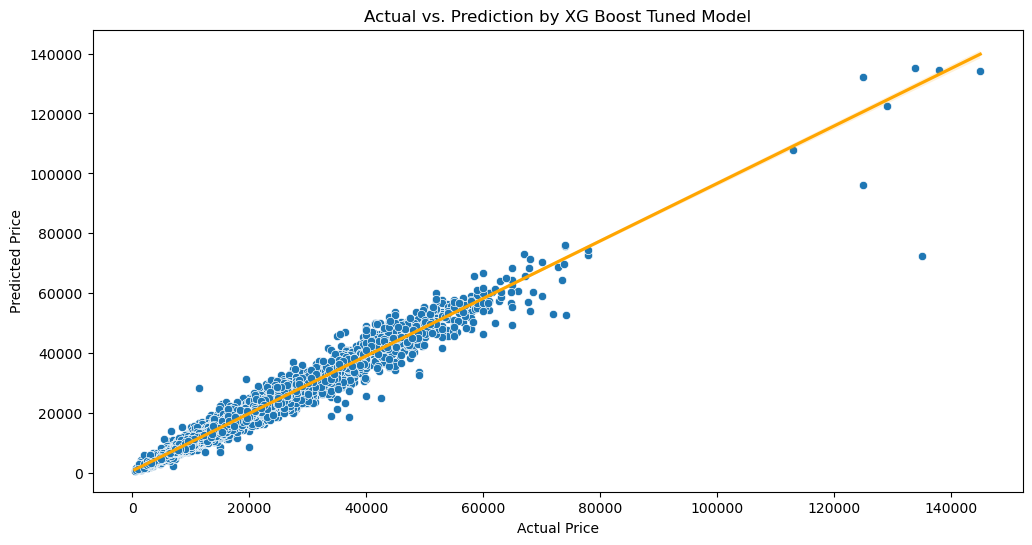

In [303]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning)
sns.regplot(x=y_test, y=y_pred_xgb_tuning, scatter=False, color='orange')
plt.title('Actual vs. Prediction by XG Boost Tuned Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

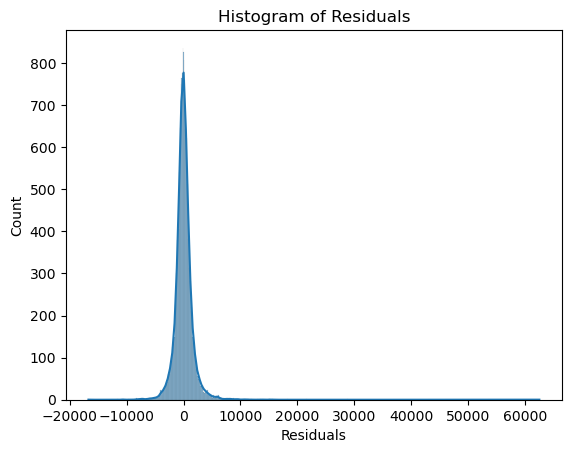

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Calculate residuals
residuals = y_test - y_pred_xgb_tuning

# Histogram of Residuals
# plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

> Histogram Residual:

- Histogram residual menunjukkan distribusi yang mendekati normal, dengan sebagian besar residual berpusat di sekitar nol.
- Terdapat beberapa outlier di kedua sisi distribusi, tetapi secara umum, distribusi residual mendekati simetris.

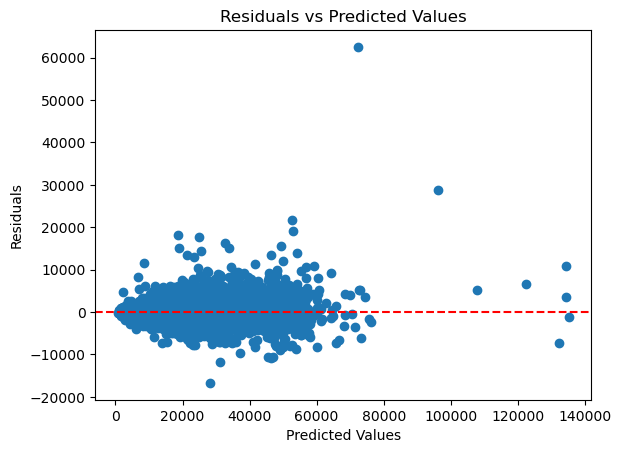

In [307]:
# Residuals vs Predicted Plot
# plt.figure(figsize=(15, 10))
plt.scatter(y_pred_xgb_tuning, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

> Plot Residual vs Predicted Values:

- Sebagian besar residual berada dekat dengan garis nol, yang menunjukkan bahwa model mampu memprediksi dengan cukup akurat untuk sebagian besar data.
- Namun, terdapat beberapa outlier dengan nilai residual yang besar, yang menunjukkan beberapa prediksi model cukup jauh dari nilai aktualnya.

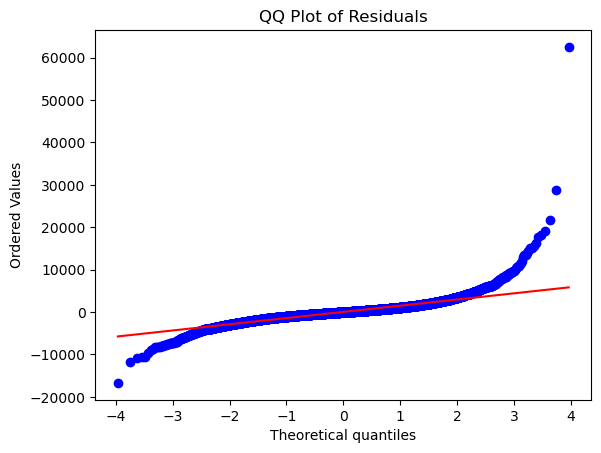

In [311]:
# QQ Plot
# plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

> QQ Plot Residual:

- QQ plot menunjukkan beberapa penyimpangan dari garis normal pada ujung distribusi, yang mengindikasikan adanya outlier di data.
- Meski begitu, secara umum, residual mengikuti distribusi normal, yang baik untuk asumsi linearitas.

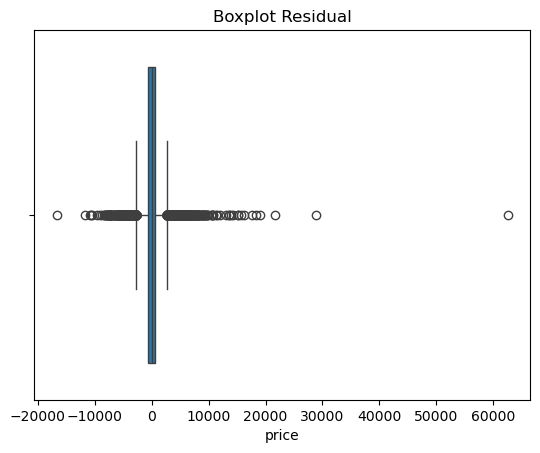

In [314]:
sns.boxplot(x=residuals, orient='h')
plt.title('Boxplot Residual')
plt.x_lable('Residual')
plt.show()

In [316]:
# Get the best model from RandomizedSearchCV
best_model = random_search_xgb.best_estimator_

# Get transformed feature names from preprocessing
transformed_features = best_model.named_steps['preprocessing'].get_feature_names_out()

# Get indices of selected features from SelectKBest
selected_indices = best_model.named_steps['feature_selection'].get_support(indices=True)

# Extract the names of the selected features
selected_features = np.array(transformed_features)[selected_indices]

# Get feature importances for the selected features
feature_importances = best_model.named_steps['regressor'].feature_importances_

# Create DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
18,onehot__transmission_Manual,0.572728
27,scaler__engineSize,0.156692
23,scaler__year,0.072929
15,onehot__brand_Vauxhall,0.027134
12,onehot__brand_Merc,0.023339
8,onehot__brand_Audi,0.017101
22,onehot__fuelType_Petrol,0.012748
10,onehot__brand_Ford,0.012534
20,onehot__fuelType_Diesel,0.011508
16,onehot__brand_Vw,0.010493


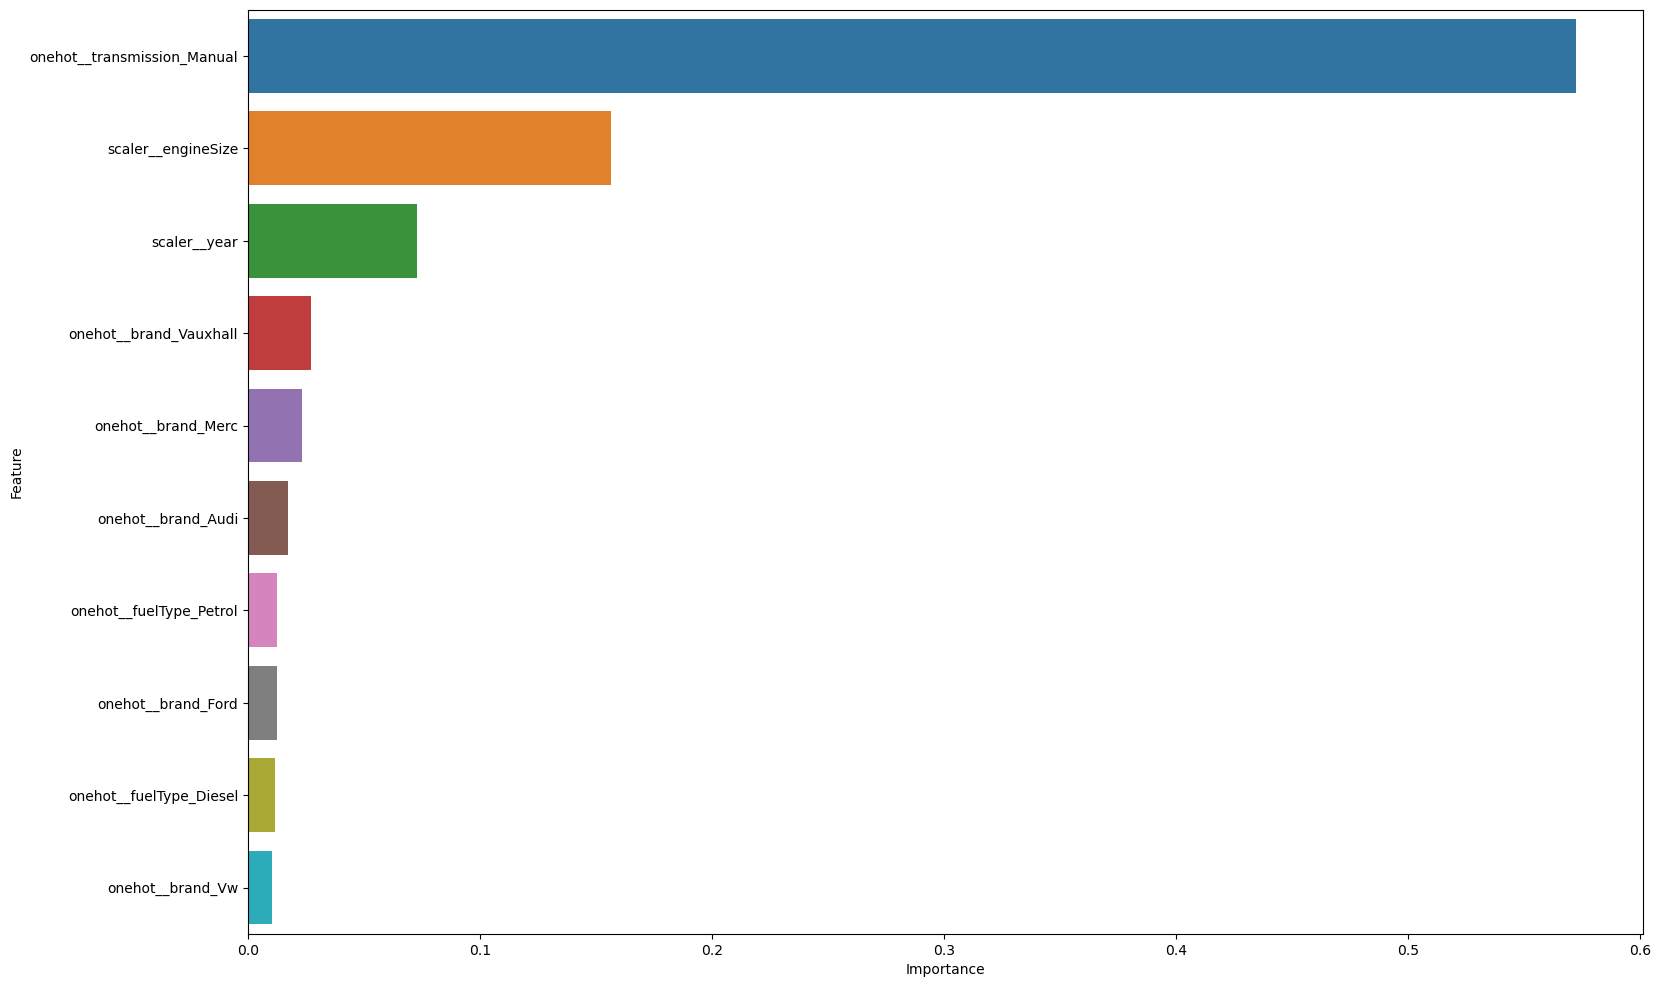

In [317]:
plt.figure(figsize=(18,12))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature',hue='Feature')
plt.show()

Fitur transmission_Manual, `engineSize`, dan `year` memiliki pengaruh terbesar dalam menentukan harga mobil, sesuai dengan logika domain yang berlaku. Beberapa fitur lainnya, terutama hasil dari encoding biner, memiliki pengaruh yang kecil.

100%|===================| 75270/75298 [37:55<00:00]        

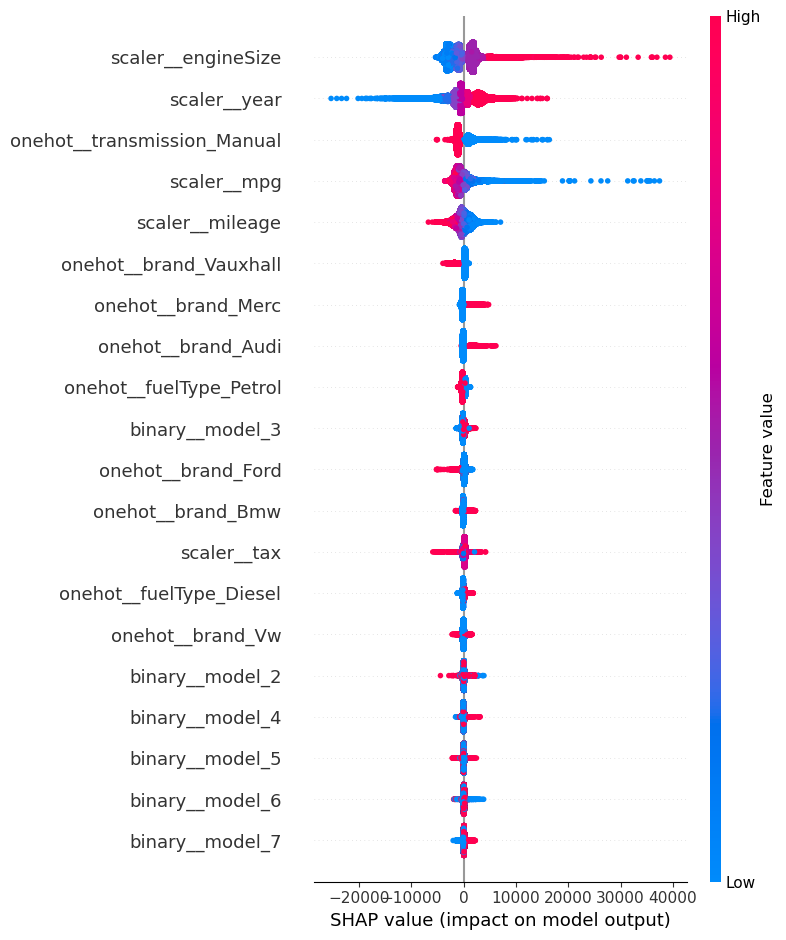

In [320]:
import shap

# Mendapatkan model terbaik dari hasil RandomizedSearchCV
best_model = random_search_xgb.best_estimator_

# Mengambil model regressor dari pipeline
xgb_model = best_model.named_steps['regressor']

# # Melakukan transformasi data (tanpa fitting ulang)
X_train_transformed = best_model.named_steps['preprocessing'].transform(X_train)
X_train_selected = best_model.named_steps['feature_selection'].transform(X_train_transformed)

# Mendapatkan nama fitur asli setelah transformasi dan seleksi fitur
feature_names = best_model.named_steps['feature_selection'].get_feature_names_out(
    input_features=best_model.named_steps['preprocessing'].get_feature_names_out()
)

# Inisialisasi objek explainer SHAP
explainer = shap.Explainer(xgb_model, X_train_selected)

# Mendapatkan nilai SHAP
shap_values = explainer(X_train_selected)

# Plot summary SHAP dengan nama fitur asli
shap.summary_plot(shap_values, X_train_selected, feature_names=feature_names)

> SHAP Insights:

Fitur 3 tertinggi adalah:
1. EngineSize
 - EngineSize mempunyai pengaruh paling signifikan terhadap prediksi model
 - Lebih tinggi enginesize (CC mesin), model memprediksi harga tinggi
 - Masuk akal karena mobil dengan cc besar cenderung berasosiasi kepada mobil mewah atau mobil 
  kelas atas
2. Year
 - Mampu memprediksi harga mobil yang mempunyai year (usia) yang tua
 - Lebih tinggi year, lebih tinggi harganya
3. Transmission (Manual)
- Fitur ini adalah kategorikal, mendekati satu (1)
- Ketika mobil mendekati 1 (alias transmisi manual), harga mobil akan diprediksi rendah
- EDA menunjukkan bahwa banyak listing mobil berukuran kecil seperti Focus dan Golf. Ini mengimplikasikan bahwa banyak orang yang mengunakkan mobil di area kota dimana ada kemungkinan adanya kemacatan atau jalan-jalan kecil, sehingga lebih cocok untuk menggunakan transmisi automatic dibandingkan manual.

In [376]:
# Save model
import pickle

final_model = random_search_xgb.best_estimator_.fit(X, y)

pickle.dump(final_model, open('UK_USED_CAR_PRICE_PREDICTION.sav', 'wb'))

In [378]:
# Load model
filename = 'UK_USED_CAR_PRICE_PREDICTION.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# 6. Conclusion and Recommendation

## 6.1 Conclusion
- Berdasarkan EDA, Ford adalah brand paling populer di UK, diiringi oleh VW dan Vauxhall. Ke-3 brand tersebut banyak peminat dikarenakan mempunya tipe mobil yang kecil atau city car yang sangat dicari, seperti Focus pada brand Ford dan Golf pada brand VW.
- Data Feature Importance menggambarkan bahwa fitur transmisi, lebih spesifik nya transmisi manual, mempunyai importance tertinggi pada model. Fitur kedua yang mempunyai dampak signifikan adalah kapasitas mesin mobil tersebut, diikuti dengan fitur ketiga yaitu `year` mobil tersebut.
- Berdasarkan fitur importance dari SHAP, EngineSize mempunyai pengaruh paling signifikan terhadap prediksi model, dimana lebih tinggi enginesize (CC mesin), model memprediksi harga tinggi lebih baik. Lalu yang ke dua adalah fitur year, dimana usianya semakin tua (nilai tahun semakin kecil), model memprediksi harga rendah lebih baik/
- MAE (Mean Absolute Error) sebesar sekitar 1006, artinya rata-rata prediksi model memiliki deviasi sekitar 1006 dari harga aktual. Mengingat harga mobil dalam dataset berkisar dari 450 hingga 159,999, nilai MAE ini relatif kecil. Ini menunjukkan bahwa model mampu memprediksi harga mobil dengan cukup baik, mengingat rentang harga yang besar.
- MAPE sebesar 6.466% menunjukkan bahwa kesalahan prediksi rata-rata model adalah sekitar 6.466% dari nilai aktual. Dengan kata lain, model memiliki tingkat akurasi yang cukup baik, mengingat kesalahan persentase berada di bawah 10%.


> Manfaat secara bisnis

**`Rule Based`** :
Pada penggunaan rule based, model menghasilkan MAE sebesar `1489` Dollar, artinya setiap prediksi yang dilakukan oleh model, punya kecendrungan meleset sebesar `1489` Dollar. Jika terdapat 100 mobil yang telah dijual, maka kerugian yang dihasilkan jika menggunakan rulebased sebesar `100 x 1489 = 148900` Dollar.

**`Machine Learning`** :
Sedangkan jika menggunakan Machine Learning, model menghasilkan MAE sebesar `1006` D1006ar, artinya setiap prediksi yang dilakukan oleh model, punya kecendrungan meleset sebesar `1006` D1006ar. Jika dianggap terdapat 100 mobil yang telah dijual, artinya kerugian yang dihasilkan jika menggunakan machine learning sebesar `100 x 1006 = 100600` Dollar.

Dengan menggunakan ML, bisa menekan kerugian sebesar 32.43% dibandingkan menggunakan Rulebased.

>Limitasi model

- Hanya dapat mengambil fitur kategorik ini:
  1. Fueltype: Petrol, Diesel, Hybrid
  2. Transmission: Automatic, Manual, Semi-automatic
- Fitur numerik:
  1. Year: 1996 - 2020

## 6.2 Recommendation

### Rekomendasi terhadap dataset:
- Penambahan fitur kepada dataset untuk meningkatkan akurasi model yaitu:
  1. Tipe body mobil: Coupe, Sedan, SUV, Wagon
  1. Nama mobil yang lengkap. Contohnya: Hyundai Kona Electric, atau BMW 3 Series 330e
  1. Dokumen legal, seperti: kelengkapan surat-surat (V5C), MOT (Inspeksi kelayakan berkendara oleh pemerintah yang diadakan per tahun), dan faktur pembelian.
- Penanganan outlier pada dataset yang lebih mendalam.

### Rekomendasi terhadap model
- Penggunaan Grid Search akan menghasilkan hasil yang lebih optimal dibanding Random Search. Grid Search akan mencari semua kombinasi hyperparameter yang menghasilkan metric yang terbaik, namun akan membutuhkan 'computational power' yang lebih tinggi, seperti processor yang lebih kuat.
- Perlu dianalisa lebih lanjut terkait dengan residual, karena terdapat banyak outlier, terutama ada beberapa yang outlier residual bernilai ekstrim.
- innya.